# Exploration of Student Dropout and Academic Success data



## 1) Import python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import scipy.stats as st
import IPython.display as disp

## 2) Define Utility Functions

In [2]:
# Function to display the value counts of 'columns' in an HTML table
# 'limit' will limit the number of rows in the table
def show_value_counts_in_table(data, columns, limit=10):
    # create a data frame for the report
    value_counts_table = pd.DataFrame()
    
    # go through each column appending the counted data to the value counts table
    for col in columns:    
        counts = data[col].value_counts().reset_index()
        counts.columns = [col, 'Count']
        value_counts_table = pd.concat([value_counts_table, counts], axis=1)

    # Limit the table to 'limit' rows and blank out cells for columns with less than 'limit' unique items
    value_counts_table = value_counts_table.head(limit)
    value_counts_table = value_counts_table.fillna("")

    # Display the table in a scrollable grid
    disp.display(disp.HTML(value_counts_table.to_html()))

In [3]:
# Function to display the relative percentage of the value counts in each column
# results will be displayed in an HTML table
# 'columns' defines which columns in 'data' to display
# 'limit' will limit the number of rows in the table
def show_value_percent_in_table(data, columns, limit=10):
    # create a data frame for the report
    value_percs_table = pd.DataFrame()
    
    # go through each column appending the counted data to the value counts table
    for col in columns:    
        percs = data[col].value_counts(normalize=True).reset_index()
        percs.columns = [col, '%']
        percs['%'] = (percs['%'] * 100).round(2)  # Convert result to a percentage to two decimal places
        value_percs_table = pd.concat([value_percs_table, percs], axis=1)

    # Limit the table to 'limit' rows and blank out cells for columns with less than 'limit' unique items
    value_percs_table = value_percs_table.head(limit)
    value_percs_table = value_percs_table.fillna("")

    # Display the table in a scrollable grid
    disp.display(disp.HTML(value_percs_table.to_html()))

In [4]:
# define a function to display a dataframe in a html table
def show_data_in_table( data ):

    # make a copy of the data so that a row number can be inserted
    dataCopy = pd.DataFrame(data)

    # Add a row number column
    dataCopy.insert(0, "Row", range(1, len(dataCopy) + 1)) 

    # Convert DataFrame to HTML with a styled scrolling table
    html = dataCopy.to_html(classes="table table-striped", index=False)

    # Custom CSS for scrolling with sticky header and row numbers
    css = """
    <style>
        .dataframe {
            display: block;
            overflow-x: auto;
            max-height: 300px;
            border-collapse: collapse;
            width: 100%;
        }
        .dataframe th {
            position: sticky;
            top: 0;
            background-color: #f8f9fa;
            z-index: 2;
        }
        .dataframe td:first-child, .dataframe th:first-child {
        position: sticky;
        left: 0;
        background-color: #ffffff;
        z-index: 1;
    }
    </style>
    """

    # Display in Jupyter Notebook
    disp.display(disp.HTML(css + html))

## 3) Data Preparation

#### Importing the data

In [5]:
# Import the data, handling the semi-colon value separator
data = pd.read_csv('students_dropout_and_academic_success.csv', sep=';')

#### Improve column naming

In [6]:
# - correct spelling mistake
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
# - make uppercase
data.columns = data.columns.str.upper()
# - replace spaces with underscores
data.columns = data.columns.str.replace(' ', '_')
# - remove brackets and use of 's 
data.columns = data.columns.str.replace('(', '')
data.columns = data.columns.str.replace(')', '')
data.columns = data.columns.str.replace("'S", '')
# - remove tab character
data.columns = data.columns.str.replace('\t', '')
# - remove leading or trailing spaces
data.columns = data.columns.str.strip()


print('Column names and data types')
print('---------------------------')
print(data.dtypes)

Column names and data types
---------------------------
MARITAL_STATUS                                    int64
APPLICATION_MODE                                  int64
APPLICATION_ORDER                                 int64
COURSE                                            int64
DAYTIME/EVENING_ATTENDANCE                        int64
PREVIOUS_QUALIFICATION                            int64
PREVIOUS_QUALIFICATION_GRADE                    float64
NATIONALITY                                       int64
MOTHER_QUALIFICATION                              int64
FATHER_QUALIFICATION                              int64
MOTHER_OCCUPATION                                 int64
FATHER_OCCUPATION                                 int64
ADMISSION_GRADE                                 float64
DISPLACED                                         int64
EDUCATIONAL_SPECIAL_NEEDS                         int64
DEBTOR                                            int64
TUITION_FEES_UP_TO_DATE                         

#### Build lists of column types: 'categorical_columns' and 'continuous_columns'

In [7]:
categorical_columns = [
    'MARITAL_STATUS',
    'APPLICATION_MODE',
    'APPLICATION_ORDER',
    'COURSE',
    'DAYTIME/EVENING_ATTENDANCE',
    'PREVIOUS_QUALIFICATION',
    'NATIONALITY',
    'MOTHER_QUALIFICATION',
    'FATHER_QUALIFICATION',
    'MOTHER_OCCUPATION',
    'FATHER_OCCUPATION',
    'DISPLACED',
    'EDUCATIONAL_SPECIAL_NEEDS',
    'DEBTOR',
    'TUITION_FEES_UP_TO_DATE',
    'GENDER',
    'SCHOLARSHIP_HOLDER',
    'INTERNATIONAL',
    'TARGET'
]

continuous_columns = [    
    'PREVIOUS_QUALIFICATION_GRADE',
    'ADMISSION_GRADE',
    'AGE_AT_ENROLLMENT',
    'CURRICULAR_UNITS_1ST_SEM_CREDITED',
    'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
    'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_1ST_SEM_APPROVED',
    'CURRICULAR_UNITS_1ST_SEM_GRADE',
    'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_CREDITED',
    'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
    'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_APPROVED',
    'CURRICULAR_UNITS_2ND_SEM_GRADE',
    'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS',
    'UNEMPLOYMENT_RATE',
    'INFLATION_RATE',
    'GDP'
]

#### Validate categorical data

##### Checking for NaN and listing unique values

In [8]:
# Look for NaN values
print("NaN Counts by column")
print("--------------------")
nans = data[categorical_columns].isnull().sum()
print(nans)
print("\n\n")


NaN Counts by column
--------------------
MARITAL_STATUS                0
APPLICATION_MODE              0
APPLICATION_ORDER             0
COURSE                        0
DAYTIME/EVENING_ATTENDANCE    0
PREVIOUS_QUALIFICATION        0
NATIONALITY                   0
MOTHER_QUALIFICATION          0
FATHER_QUALIFICATION          0
MOTHER_OCCUPATION             0
FATHER_OCCUPATION             0
DISPLACED                     0
EDUCATIONAL_SPECIAL_NEEDS     0
DEBTOR                        0
TUITION_FEES_UP_TO_DATE       0
GENDER                        0
SCHOLARSHIP_HOLDER            0
INTERNATIONAL                 0
TARGET                        0
dtype: int64





In [9]:

# Report on unique values
print("Unique values by column")
print("-----------------------")
for col in categorical_columns:
    print(f"Unique values and counts for '{col}':")
    print(data[col].value_counts())
    print("\n") 

Unique values by column
-----------------------
Unique values and counts for 'MARITAL_STATUS':
MARITAL_STATUS
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


Unique values and counts for 'APPLICATION_MODE':
APPLICATION_MODE
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64


Unique values and counts for 'APPLICATION_ORDER':
APPLICATION_ORDER
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64


Unique values and counts for 'COURSE':
COURSE
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64


Unique values and counts for 'DAYTIME/EVENING_ATTENDANCE

##### Validate that International has been set correctly

In [10]:
# check that every student with NATIONALITY of Portuguese has a INTERNATIONAL value set to 'no'
portuguese_students = data[data['NATIONALITY'] == 'Portuguese']
all_local = portuguese_students['INTERNATIONAL'].eq('no').all()

if all_local:
    print("Data validated: All Portuguese students have 'no' in the INTERNATIONAL column.")
else:
    print("Data Quality error: Not all Portuguese students have 'no' in the INTERNATIONAL column.")

Data validated: All Portuguese students have 'no' in the INTERNATIONAL column.


#### Comments about the categorical data 
- No null/NaN data values found
- Although APPLICATION_ORDER was described as 0 for 'first choice', most of the rows have a value of 1, so 1 is likely to be the first choice.
  - Action: consider the '0' value an outlier and correct it to '1'


In [11]:
# correct APPLICATION_ORDER outlier
data.loc[data['APPLICATION_ORDER'] == 0, 'APPLICATION_ORDER'] = 1
print(data['APPLICATION_ORDER'].value_counts()) 

APPLICATION_ORDER
1    3027
2     547
3     309
4     249
5     154
6     137
9       1
Name: count, dtype: int64


#### Validate continuous data

##### Check for NaN and infinite values

In [12]:
# Look for NaN values
print("NaN Counts by column")
print("--------------------")
nans = data[continuous_columns].isnull().sum()
print(nans)
print("")

# Look for +/- infinity
inf_rows_count = data[continuous_columns].isin([np.inf, -np.inf]).any(axis=1).sum()
if (inf_rows_count==0):
    print("Data validated: No infinite values found.")
else:
    print("Data Quality error: Infinite values found in the data.")

NaN Counts by column
--------------------
PREVIOUS_QUALIFICATION_GRADE                    0
ADMISSION_GRADE                                 0
AGE_AT_ENROLLMENT                               0
CURRICULAR_UNITS_1ST_SEM_CREDITED               0
CURRICULAR_UNITS_1ST_SEM_ENROLLED               0
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS            0
CURRICULAR_UNITS_1ST_SEM_APPROVED               0
CURRICULAR_UNITS_1ST_SEM_GRADE                  0
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS    0
CURRICULAR_UNITS_2ND_SEM_CREDITED               0
CURRICULAR_UNITS_2ND_SEM_ENROLLED               0
CURRICULAR_UNITS_2ND_SEM_EVALUATIONS            0
CURRICULAR_UNITS_2ND_SEM_APPROVED               0
CURRICULAR_UNITS_2ND_SEM_GRADE                  0
CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS    0
UNEMPLOYMENT_RATE                               0
INFLATION_RATE                                  0
GDP                                             0
dtype: int64

Data validated: No infinite values found.


##### Check GRADE values for out of range issues

In [13]:
# Check if all GRADE values fall in the range defined by the Dataset description
assert data['PREVIOUS_QUALIFICATION_GRADE'].between(0, 200).all(), "Data Error: PREVIOUS_QUALIFICATION_GRADE values are out of range."
assert data['ADMISSION_GRADE'].between(0, 200).all(), "Data Error: ADMISSION_GRADE values are out of range."
assert data['CURRICULAR_UNITS_1ST_SEM_GRADE'].between(0, 20).all(), "Data Error: CURRICULAR_UNITS_1ST_SEM_GRADE values are out of range."
assert data['CURRICULAR_UNITS_2ND_SEM_GRADE'].between(0, 20).all(), "Data Error: CURRICULAR_UNITS_2ND_SEM_GRADE values are out of range."

##### Validate the 1st and 2nd semester data

In [14]:
# Investigate the 'enrolled' unit counts
# Check if any students with 0 enrolled units had evaluations or were approved or given grades
data_no_units_enrolled_sem1 = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0)]
data_no_units_enrolled_sem2 = data[(data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] == 0)]
data_enrolled_in_sem2_but_not_sem1 = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0) & (data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] > 0)]

data_no_units_enrolled_sem1_but_with_evaluation = data[(data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0) & 
    ( (data['CURRICULAR_UNITS_1ST_SEM_EVALUATIONS'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_APPROVED'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_GRADE'] > 0) |
     (data['CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS'] > 0))]

data_no_units_enrolled_sem2_but_with_evaluation = data[(data['CURRICULAR_UNITS_2ND_SEM_ENROLLED'] == 0) & 
    ( (data['CURRICULAR_UNITS_2ND_SEM_EVALUATIONS'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_APPROVED'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_GRADE'] > 0) |
     (data['CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS'] > 0))]

print(f"Students with no enrollment in 1st Semester: {len(data_no_units_enrolled_sem1)}")
print(f"Students with no enrollment in 2nd Semester: {len(data_no_units_enrolled_sem2)}")
print(f"Students with enrollment in 2nd Semester, but not 1st: {len(data_enrolled_in_sem2_but_not_sem1)}")

print(f"Students with no enrollment in 1st Semester, but with further evaluation or grading: {len(data_no_units_enrolled_sem1_but_with_evaluation)}")
print(f"Students with no enrollment in 2nd Semester, but with further evaluation or grading: {len(data_no_units_enrolled_sem2_but_with_evaluation)}")

# check the Target value counts for those students
data_no_units_enrolled_sem1['TARGET'].value_counts()

Students with no enrollment in 1st Semester: 180
Students with no enrollment in 2nd Semester: 180
Students with enrollment in 2nd Semester, but not 1st: 0
Students with no enrollment in 1st Semester, but with further evaluation or grading: 0
Students with no enrollment in 2nd Semester, but with further evaluation or grading: 0


TARGET
Dropout     77
Graduate    75
Enrolled    28
Name: count, dtype: int64

#### Comments about the continuous data 
- No null/NaN/infinite data values found
- Grade values are inside defined boundaries
- There are 180 students with a mix of Target data results but with no curricular unit data. This could distort the analysis results.
  - Action: Drop those rows.


In [15]:
# drop the rows with no unit enrollment in the 1st semester as that will drop all of the rows with missing curricular unit data
rows_count_before = data.shape[0]
data = data.drop(data[data['CURRICULAR_UNITS_1ST_SEM_ENROLLED'] == 0].index)
rows_count_after = data.shape[0]
print(f"Dropped {rows_count_before-rows_count_after} rows ")

Dropped 180 rows 


#### Feature creation

##### AGE_GROUP_AT_ENROLLMENT

In [16]:
# Create the age group at enrollment feature by binning the AGE_AT_ENROLLMENT values

# Define the bins and labels
bins = [0, 18, 20, 30, float('inf')]  # age bins
labels = ['Under 19', '19-20', '21-30', 'Over 30']  # bin labels

# Create a new column for the binned age groups
data['AGE_GROUP_AT_ENROLLMENT'] = pd.cut(data['AGE_AT_ENROLLMENT'], bins=bins, labels=labels).astype(str)

# Count the occurrences of each Age_Group
age_counts = data['AGE_GROUP_AT_ENROLLMENT'].value_counts().reset_index()
age_counts.columns = ['AGE_GROUP_AT_ENROLLMENT', 'Count']  # Rename columns

# Add the column to the categorical columns
categorical_columns.append('AGE_GROUP_AT_ENROLLMENT')

# Display the DataFrame
print(age_counts)

  AGE_GROUP_AT_ENROLLMENT  Count
0                   19-20   1437
1                   21-30   1174
2                Under 19    978
3                 Over 30    655


#### Feature transformation

## 4) Data Exploration

### Improve readability of Nominal Data for Data Exploration
- Create 'data_vis' as a copy of the data for visualisation
- label the encoded nominal variables
- 'data' will continue to be used for machine learning

In [17]:
# create the 'data_vis' data
data_vis = data.copy()

##### 'Marital status' column

In [18]:
# Use labels from the Dataset definition
marital_status_labels = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

# Map the labels to the data values
data_vis['MARITAL_STATUS'] = data_vis['MARITAL_STATUS'].map(marital_status_labels)

##### 'Application mode' column

In [19]:
# Use labels from the Dataset definition
application_mode_labels = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Map the labels to the data values
data_vis['APPLICATION_MODE'] = data_vis['APPLICATION_MODE'].map(application_mode_labels)

##### 'Application order' is Ordinal (1 is first choice, 9 is last choice) so values left as numbers

##### 'Course' column

In [20]:
# Use labels from the Dataset definition
course_labels = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Map the labels to the data values
data_vis['COURSE'] = data_vis['COURSE'].map(course_labels)

##### 'Daytime/evening attendance' column

In [21]:
# Use labels from the Dataset definition
daytime_evening_labels = {
    1: 'daytime',
    0: 'evening'
}

# Map the labels to the data values
data_vis['DAYTIME/EVENING_ATTENDANCE'] = data_vis['DAYTIME/EVENING_ATTENDANCE'].map(daytime_evening_labels)

##### 'Previous qualification' column

In [22]:
# Use labels from the Dataset definition
previous_qualification_labels = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Map the labels to the data values
data_vis['PREVIOUS_QUALIFICATION'] = data_vis['PREVIOUS_QUALIFICATION'].map(previous_qualification_labels)

##### 'Nationality' column

In [23]:
# Use labels from the Dataset definition
nationality_labels = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

# Map the labels to the data values
data_vis['NATIONALITY'] = data_vis['NATIONALITY'].map(nationality_labels)

##### 'Mother's  and Father's qualification' columns

In [24]:
# Use labels from the Dataset definition
qualification_labels = {
    1: "Secondary Education - 12th Year of Schooling or Eq.", 
    2: "Higher Education - Bachelor's Degree", 
    3: "Higher Education - Degree", 
    4: "Higher Education - Master's", 
    5: "Higher Education - Doctorate", 
    6: "Frequency of Higher Education", 
    9: "12th Year of Schooling - Not Completed", 
    10: "11th Year of Schooling - Not Completed", 
    11: "7th Year (Old)", 
    12: "Other - 11th Year of Schooling", 
    13: "2nd year complementary high school course", 
    14: "10th Year of Schooling", 
    18: "General commerce course", 
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 
    20: "Complementary High School Course", 
    22: "Technical-professional course", 
    25: "Complementary High School Course - not concluded", 
    26: "7th year of schooling", 
    27: "2nd cycle of the general high school course", 
    29: "9th Year of Schooling - Not Completed", 
    30: "8th year of schooling", 
    31: "General Course of Administration and Commerce", 
    33: "Supplementary Accounting and Administration", 
    34: "Unknown", 
    35: "Can't read or write", 
    36: "Can read without having a 4th year of schooling", 
    37: "Basic education 1st cycle (4th/5th year) or equiv.", 
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 
    39: "Technological specialization course", 
    40: "Higher education - degree (1st cycle)", 
    41: "Specialized higher studies course", 
    42: "Professional higher technical course", 
    43: "Higher Education - Master (2nd cycle)", 
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Map the labels to the data values
data_vis['MOTHER_QUALIFICATION'] = data_vis['MOTHER_QUALIFICATION'].map(qualification_labels)
data_vis['FATHER_QUALIFICATION'] = data_vis['FATHER_QUALIFICATION'].map(qualification_labels)

##### TODO Idea for feature: group qualifications into standards of education (perhaps five groups?)

##### 'Mother's  and Father's occupation' columns

In [25]:
# Use labels from the Dataset definition
occupation_labels = {
    0: "Student", 
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 
    2: "Specialists in Intellectual and Scientific Activities", 
    3: "Intermediate Level Technicians and Professions", 
    4: "Administrative staff", 
    5: "Personal Services, Security and Safety Workers and Sellers", 
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 
    7: "Skilled Workers in Industry, Construction and Craftsmen", 
    8: "Installation and Machine Operators and Assembly Workers", 
    9: "Unskilled Workers", 
    10: "Armed Forces Professions", 
    90: "Other Situation", 
    99: "(blank)", 
    101: "Armed Forces Officers", 
    102: "Armed Forces Sergeants", 
    103: "Other Armed Forces personnel", 
    112: "Directors of administrative and commercial services", 
    114: "Hotel, catering, trade and other services directors", 
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques", 
    122: "Health professionals", 
    123: "Teachers", 
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations", 
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions", 
    132: "Technicians and professionals, of intermediate level of health", 
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 
    135: "Information and communication technology technicians", 
    141: "Office workers, secretaries in general and data processing operators", 
    143: "Data, accounting, statistical, financial services and registry-related operators", 
    144: "Other administrative support staff", 
    151: "Personal service workers", 
    152: "Sellers", 
    153: "Personal care workers and the like", 
    154: "Protection and security services personnel", 
    161: "Market-oriented farmers and skilled agricultural and animal production workers", 
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence", 
    171: "Skilled construction workers and the like, except electricians", 
    172: "Skilled workers in metallurgy, metalworking and similar", 
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like", 
    174: "Skilled workers in electricity and electronics", 
    175: "Workers in food processing, woodworking, clothing and other industries and crafts", 
    181: "Fixed plant and machine operators", 
    182: "Assembly workers", 
    183: "Vehicle drivers and mobile equipment operators", 
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry", 
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport", 
    194: "Meal preparation assistants", 
    195: "Street vendors (except food) and street service providers"
}

data_vis['MOTHER_OCCUPATION'] = data_vis['MOTHER_OCCUPATION'].map(occupation_labels)
data_vis['FATHER_OCCUPATION'] = data_vis['FATHER_OCCUPATION'].map(occupation_labels)


##### Dichotomous columns: 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'GENDER', 'Scholarship holder' and 'International'

In [26]:
# Use labels from the Dataset definition
binary_labels = {1: 'yes', 0: 'no'}
gender_labels = {1: 'male', 0: 'female'}

# Map the labels to the data values
data_vis['DISPLACED'] = data_vis['DISPLACED'].map(binary_labels)
data_vis['EDUCATIONAL_SPECIAL_NEEDS'] = data_vis['EDUCATIONAL_SPECIAL_NEEDS'].map(binary_labels)
data_vis['DEBTOR'] = data_vis['DEBTOR'].map(binary_labels)
data_vis['TUITION_FEES_UP_TO_DATE'] = data_vis['TUITION_FEES_UP_TO_DATE'].map(binary_labels)
data_vis['GENDER'] = data_vis['GENDER'].map(gender_labels)
data_vis['SCHOLARSHIP_HOLDER'] = data_vis['SCHOLARSHIP_HOLDER'].map(binary_labels)
data_vis['INTERNATIONAL'] = data_vis['INTERNATIONAL'].map(binary_labels)

### Statistical Summary

##### Display tables of Categorical data count & relative percentage information

In [27]:
show_value_counts_in_table(data_vis, categorical_columns)
show_value_percent_in_table(data_vis, categorical_columns)

,MARITAL_STATUS,Count,APPLICATION_MODE,Count,APPLICATION_ORDER,Count,COURSE,Count,DAYTIME/EVENING_ATTENDANCE,Count,PREVIOUS_QUALIFICATION,Count,NATIONALITY,Count,MOTHER_QUALIFICATION,Count,FATHER_QUALIFICATION,Count,MOTHER_OCCUPATION,Count,FATHER_OCCUPATION,Count,DISPLACED,Count,EDUCATIONAL_SPECIAL_NEEDS,Count,DEBTOR,Count,TUITION_FEES_UP_TO_DATE,Count,GENDER,Count,SCHOLARSHIP_HOLDER,Count,INTERNATIONAL,Count,TARGET,Count,AGE_GROUP_AT_ENROLLMENT,Count
0,single,3742.0,1st phase - general contingent,1593.0,1.0,2898.0,Nursing,766.0,daytime,3761.0,Secondary education,3550.0,Portuguese,4140.0,Secondary Education - 12th Year of Schooling or Eq.,1024.0,Basic education 1st cycle (4th/5th year) or equiv.,1165.0,Unskilled Workers,1516.0,Unskilled Workers,964,yes,2281.0,no,4198.0,no,3764.0,yes,3741.0,female,2789.0,no,3189.0,no,4140.0,Graduate,2134.0,19-20,1437.0
1,married,376.0,2nd phase - general contingent,843.0,2.0,528.0,Management,380.0,evening,483.0,Technological specialization course,212.0,Brazilian,33.0,Basic education 1st cycle (4th/5th year) or equiv.,978.0,Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,934.0,Administrative staff,785.0,"Skilled Workers in Industry, Construction and Craftsmen",642,no,1963.0,yes,46.0,yes,480.0,no,503.0,male,1455.0,yes,1055.0,yes,104.0,Dropout,1344.0,21-30,1174.0
2,divorced,91.0,Over 23 years old,776.0,3.0,294.0,Social Service,355.0,,,Basic education 3rd cycle (9th/10th/11th year) or equiv.,160.0,Santomean,14.0,Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,915.0,Secondary Education - 12th Year of Schooling or Eq.,864.0,"Personal Services, Security and Safety Workers and Sellers",506.0,"Personal Services, Security and Safety Workers and Sellers",498,,,,,,,,,,,,,,,Enrolled,766.0,Under 19,978.0
3,facto union,25.0,Change of course,301.0,4.0,237.0,Veterinary Nursing,337.0,,,Higher education - degree,124.0,Cape Verdean,13.0,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,546.0,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,680.0,Intermediate Level Technicians and Professions,340.0,Administrative staff,376,,,,,,,,,,,,,,,,,Over 30,655.0
4,legally separated,6.0,Technological specialization diploma holders,207.0,5.0,151.0,Journalism and Communication,331.0,,,Other - 11th year of schooling,44.0,Spanish,13.0,Higher Education - Degree,404.0,Higher Education - Degree,263.0,Specialists in Intellectual and Scientific Activities,293.0,Intermediate Level Technicians and Professions,362,,,,,,,,,,,,,,,,,,
5,widower,4.0,Holders of other higher courses,137.0,6.0,135.0,Management (evening attendance),268.0,,,Higher education - degree (1st cycle),40.0,Guinean,5.0,Unknown,129.0,Unknown,111.0,"Skilled Workers in Industry, Construction and Craftsmen",260.0,Installation and Machine Operators and Assembly Workers,304,,,,,,,,,,,,,,,,,,
6,,,3rd phase - general contingent,122.0,9.0,1.0,Advertising and Marketing Management,268.0,,,Professional higher technical course,36.0,Moldova (Republic of),3.0,Higher Education - Bachelor's Degree,79.0,Higher Education - Bachelor's Degree,62.0,Student,142.0,Armed Forces Professions,255,,,,,,,,,,,,,,,,,,
7,,,Transfer,76.0,,,Tourism,252.0,,,Higher education - bachelor's degree,22.0,Italian,3.0,Higher Education - Master's,47.0,Higher Education - Master's,35.0,"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",95.0,"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",237,,,,,,,,,,,,,,,,,,
8,,,Change of institution/course,59.0,,,Communication Design,226.0,,,Frequency of higher education,16.0,Ukrainian,3.0,Other - 11th Year of Schooling,39.0,Other - 11th Year of Schooling,34.0,"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",89.0,Specialists in Intellectual and Scientific Activities,179,,,,,,,,,,,,,,,,,,
9,,,Short cycle diploma holders,35.0,,,Social Service (evening attendance),215.0,,,12th year of schooling - not completed,11.0,Angolan,2.0,Higher Education - Doctorate,20.

,MARITAL_STATUS,%,APPLICATION_MODE,%,APPLICATION_ORDER,%,COURSE,%,DAYTIME/EVENING_ATTENDANCE,%,PREVIOUS_QUALIFICATION,%,NATIONALITY,%,MOTHER_QUALIFICATION,%,FATHER_QUALIFICATION,%,MOTHER_OCCUPATION,%,FATHER_OCCUPATION,%,DISPLACED,%,EDUCATIONAL_SPECIAL_NEEDS,%,DEBTOR,%,TUITION_FEES_UP_TO_DATE,%,GENDER,%,SCHOLARSHIP_HOLDER,%,INTERNATIONAL,%,TARGET,%,AGE_GROUP_AT_ENROLLMENT,%
0,single,88.17,1st phase - general contingent,37.54,1.0,68.28,Nursing,18.05,daytime,88.62,Secondary education,83.65,Portuguese,97.55,Secondary Education - 12th Year of Schooling or Eq.,24.13,Basic education 1st cycle (4th/5th year) or equiv.,27.45,Unskilled Workers,35.72,Unskilled Workers,22.71,yes,53.75,no,98.92,no,88.69,yes,88.15,female,65.72,no,75.14,no,97.55,Graduate,50.28,19-20,33.86
1,married,8.86,2nd phase - general contingent,19.86,2.0,12.44,Management,8.95,evening,11.38,Technological specialization course,5.00,Brazilian,0.78,Basic education 1st cycle (4th/5th year) or equiv.,23.04,Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,22.01,Administrative staff,18.50,"Skilled Workers in Industry, Construction and Craftsmen",15.13,no,46.25,yes,1.08,yes,11.31,no,11.85,male,34.28,yes,24.86,yes,2.45,Dropout,31.67,21-30,27.66
2,divorced,2.14,Over 23 years old,18.28,3.0,6.93,Social Service,8.36,,,Basic education 3rd cycle (9th/10th/11th year) or equiv.,3.77,Santomean,0.33,Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,21.56,Secondary Education - 12th Year of Schooling or Eq.,20.36,"Personal Services, Security and Safety Workers and Sellers",11.92,"Personal Services, Security and Safety Workers and Sellers",11.73,,,,,,,,,,,,,,,Enrolled,18.05,Under 19,23.04
3,facto union,0.59,Change of course,7.09,4.0,5.58,Veterinary Nursing,7.94,,,Higher education - degree,2.92,Cape Verdean,0.31,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,12.87,Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,16.02,Intermediate Level Technicians and Professions,8.01,Administrative staff,8.86,,,,,,,,,,,,,,,,,Over 30,15.43
4,legally separated,0.14,Technological specialization diploma holders,4.88,5.0,3.56,Journalism and Communication,7.80,,,Other - 11th year of schooling,1.04,Spanish,0.31,Higher Education - Degree,9.52,Higher Education - Degree,6.20,Specialists in Intellectual and Scientific Activities,6.90,Intermediate Level Technicians and Professions,8.53,,,,,,,,,,,,,,,,,,
5,widower,0.09,Holders of other higher courses,3.23,6.0,3.18,Management (evening attendance),6.31,,,Higher education - degree (1st cycle),0.94,Guinean,0.12,Unknown,3.04,Unknown,2.62,"Skilled Workers in Industry, Construction and Craftsmen",6.13,Installation and Machine Operators and Assembly Workers,7.16,,,,,,,,,,,,,,,,,,
6,,,3rd phase - general contingent,2.87,9.0,0.02,Advertising and Marketing Management,6.31,,,Professional higher technical course,0.85,Moldova (Republic of),0.07,Higher Education - Bachelor's Degree,1.86,Higher Education - Bachelor's Degree,1.46,Student,3.35,Armed Forces Professions,6.01,,,,,,,,,,,,,,,,,,
7,,,Transfer,1.79,,,Tourism,5.94,,,Higher education - bachelor's degree,0.52,Italian,0.07,Higher Education - Master's,1.11,Higher Education - Master's,0.82,"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",2.24,"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",5.58,,,,,,,,,,,,,,,,,,
8,,,Change of institution/course,1.39,,,Communication Design,5.33,,,Frequency of higher education,0.38,Ukrainian,0.07,Other - 11th Year of Schooling,0.92,Other - 11th Year of Schooling,0.80,"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",2.10,Specialists in Intellectual and Scientific Activities,4.22,,,,,,,,,,,,,,,,,,
9,,,Short cycle diploma holders,0.82,,,Social Service (evening attendance),5.07,,,12th year of schooling - not completed,0.26,Angolan,0.05,Higher Education - Doctorate,0.47,Technological specialization course,0.42,Other Situation,1.65,Student,2.99,,,,,,,,,,,,,,,,,,


##### Display a table of Continuous data Summary information

In [28]:
data[continuous_columns].describe()

,PREVIOUS_QUALIFICATION_GRADE,ADMISSION_GRADE,AGE_AT_ENROLLMENT,CURRICULAR_UNITS_1ST_SEM_CREDITED,CURRICULAR_UNITS_1ST_SEM_ENROLLED,CURRICULAR_UNITS_1ST_SEM_EVALUATIONS,CURRICULAR_UNITS_1ST_SEM_APPROVED,CURRICULAR_UNITS_1ST_SEM_GRADE,CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS,CURRICULAR_UNITS_2ND_SEM_CREDITED,CURRICULAR_UNITS_2ND_SEM_ENROLLED,CURRICULAR_UNITS_2ND_SEM_EVALUATIONS,CURRICULAR_UNITS_2ND_SEM_APPROVED,CURRICULAR_UNITS_2ND_SEM_GRADE,CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS,UNEMPLOYMENT_RATE,INFLATION_RATE,GDP
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,132.373115,126.607163,23.397738,0.740104,6.536522,8.651037,4.906221,11.092129,0.143497,0.564797,6.496466,8.405278,4.623940,10.664098,0.156692,11.560839,1.229076,0.020895
std,13.059485,14.281839,7.684054,2.405427,2.161810,3.893594,3.000144,4.410127,0.704788,1.955502,1.819121,3.656824,2.933299,4.865825,0.768947,2.663836,1.377679,2.272994
min,95.000000,95.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,124.000000,117.800000,19.000000,0.000000,6.000000,7.000000,3.000000,11.250000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.000000,125.800000,20.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.100000,25.000000,0.000000,7.000000,10.000000,6.000000,13.428571,0.000000,0.000000,7.000000,10.000000,6.000000,13.416354,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Visualisation

In [29]:
# Group by course and calculate the count of each outcome
course_grouped = data_vis.groupby('COURSE')['TARGET'].value_counts().unstack().fillna(0)
print("Student outcomes grouped by course:")
print(course_grouped)

# Group by gender and calculate the count of each outcome
gender_grouped = data_vis.groupby('GENDER')['TARGET'].value_counts().unstack().fillna(0)
print("\nStudent outcomes grouped by gender:")
print(gender_grouped)

# Group by tuition fees up to date and calculate the count of each outcome
tuition_grouped = data_vis.groupby('TUITION_FEES_UP_TO_DATE')['TARGET'].value_counts().unstack().fillna(0)
print("\nStudent outcomes grouped by tuition fees up to date:")
print(tuition_grouped)

# Group by scholarship holder and calculate the count of each outcome
scholarship_grouped = data_vis.groupby('SCHOLARSHIP_HOLDER')['TARGET'].value_counts().unstack().fillna(0)
print("\nStudent outcomes grouped by scholarship holder:")
print(scholarship_grouped)

Student outcomes grouped by course:
TARGET                                Dropout  Enrolled  Graduate
COURSE                                                           
Advertising and Marketing Management       95        48       125
Agronomy                                   86        37        87
Animation and Multimedia Design             5         9        21
Basic Education                            85        50        57
Biofuel Production Technologies             8         3         1
Communication Design                       51        42       133
Equinculture                               78        21        42
Informatics Engineering                    92        64        14
Journalism and Communication              101        34       196
Management                                134       108       138
Management (evening attendance)           136        54        78
Nursing                                   118       100       548
Oral Hygiene                            

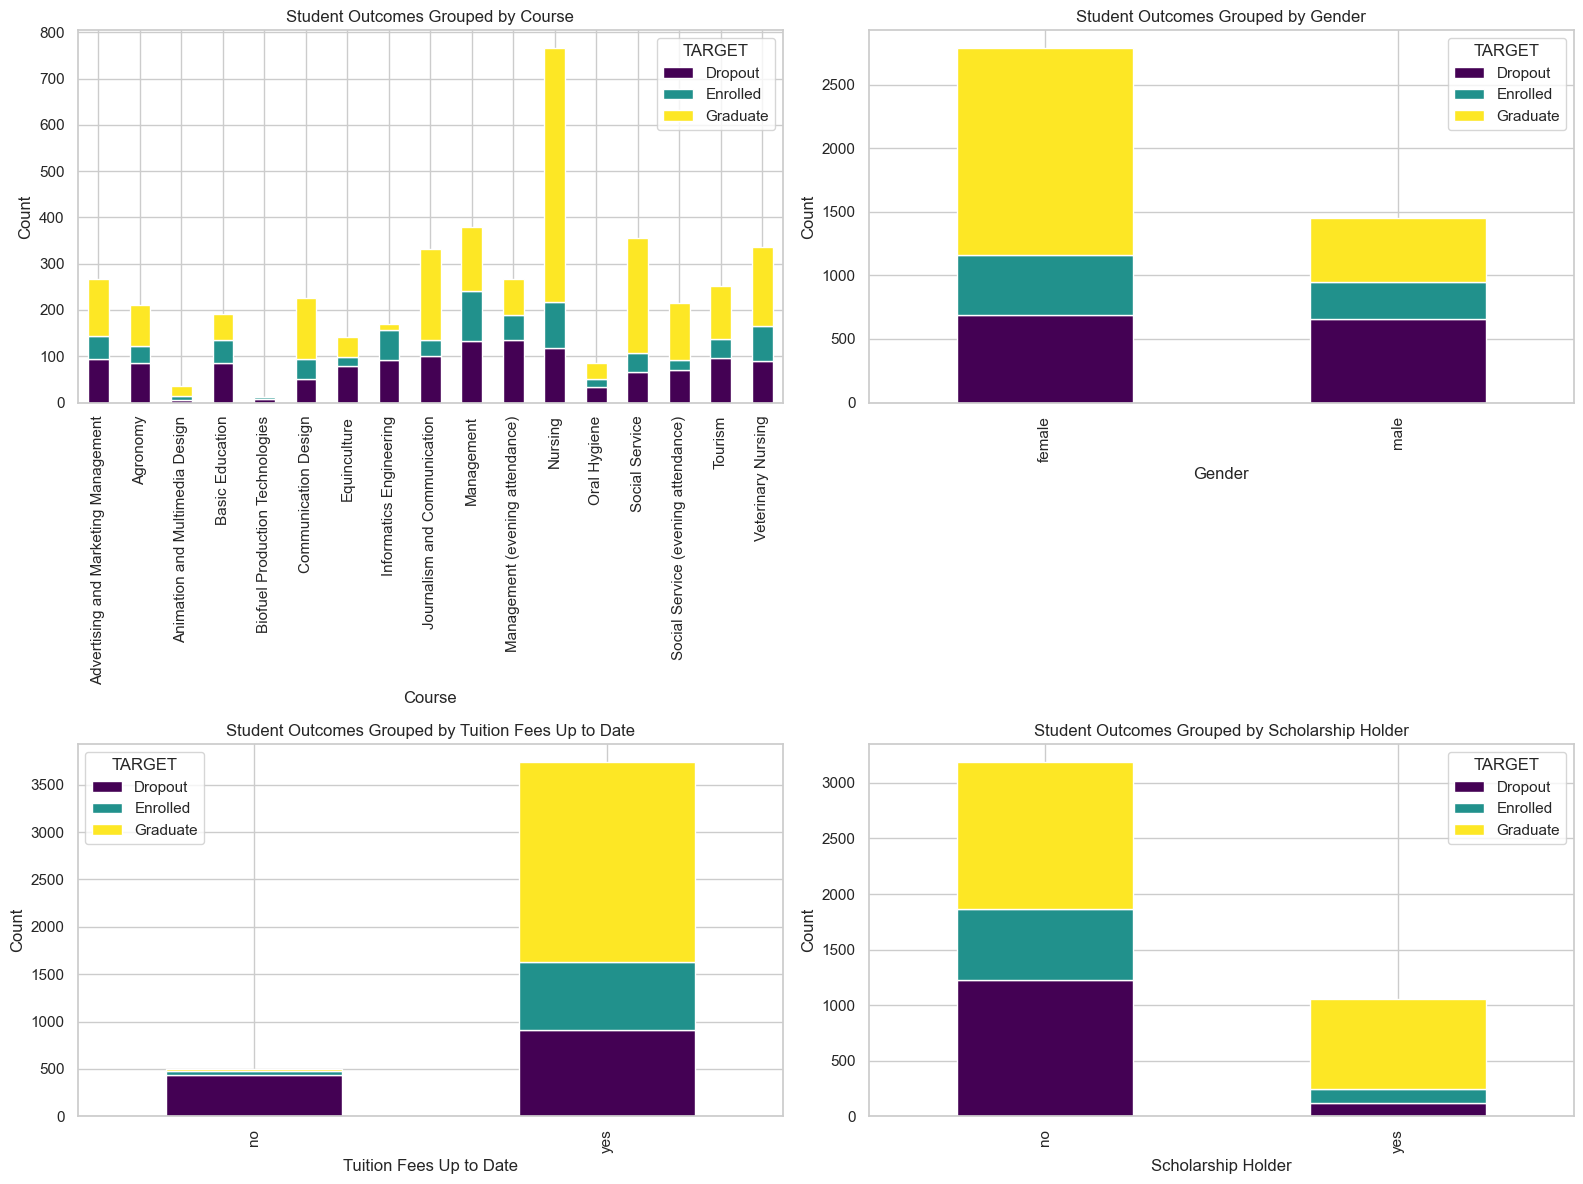

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the grouped data for course
course_grouped.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('Student Outcomes Grouped by Course')
axes[0, 0].set_xlabel('Course')
axes[0, 0].set_ylabel('Count')

# Plot the grouped data for gender
gender_grouped.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title('Student Outcomes Grouped by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot the grouped data for tuition fees up to date
tuition_grouped.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Student Outcomes Grouped by Tuition Fees Up to Date')
axes[1, 0].set_xlabel('Tuition Fees Up to Date')
axes[1, 0].set_ylabel('Count')

# Plot the grouped data for scholarship holder
scholarship_grouped.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Student Outcomes Grouped by Scholarship Holder')
axes[1, 1].set_xlabel('Scholarship Holder')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_2448\4132749099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data_vis, palette='viridis')


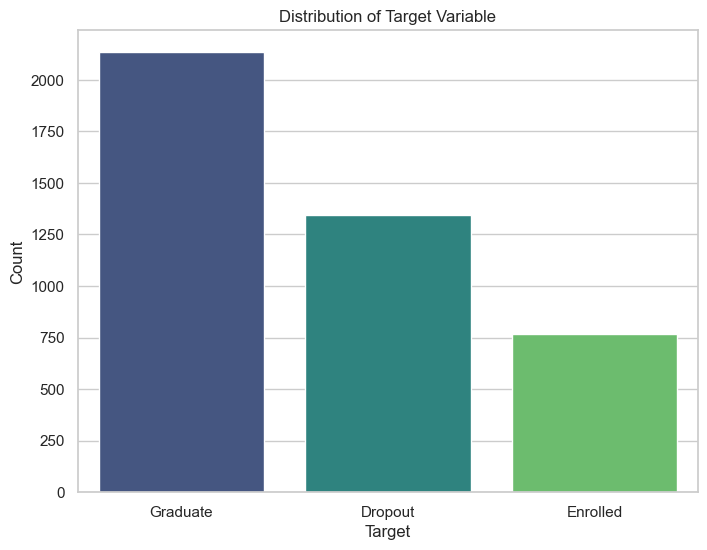

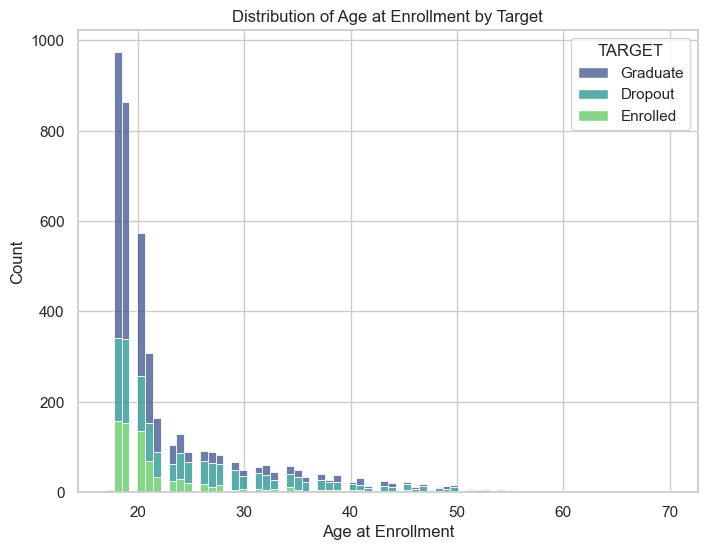

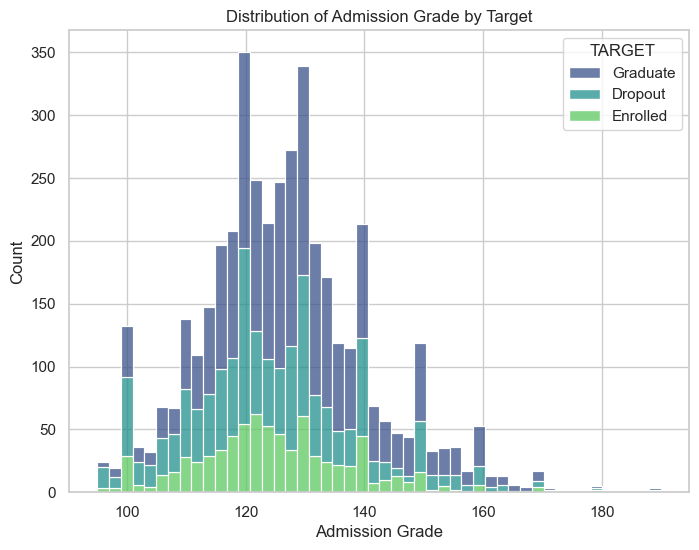

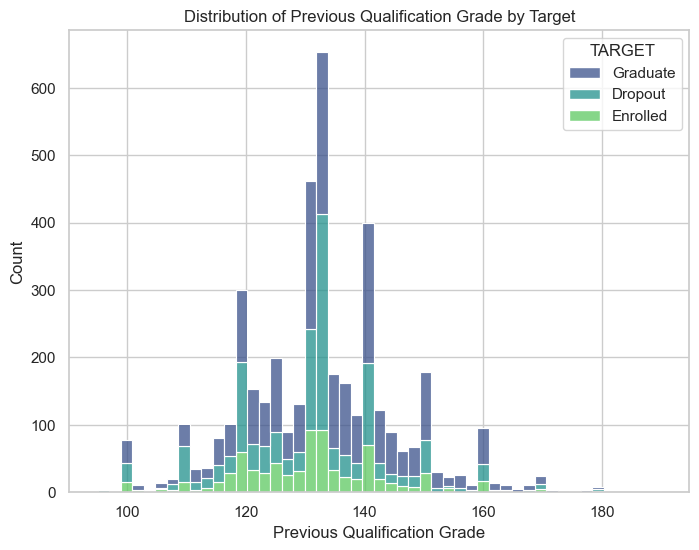

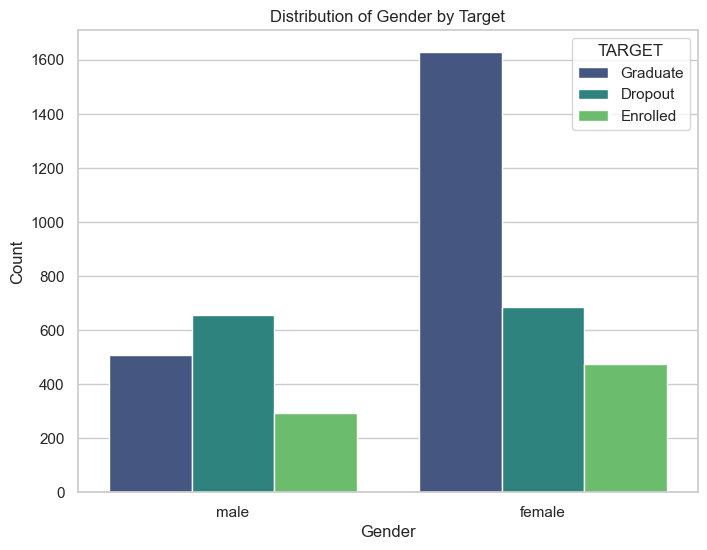

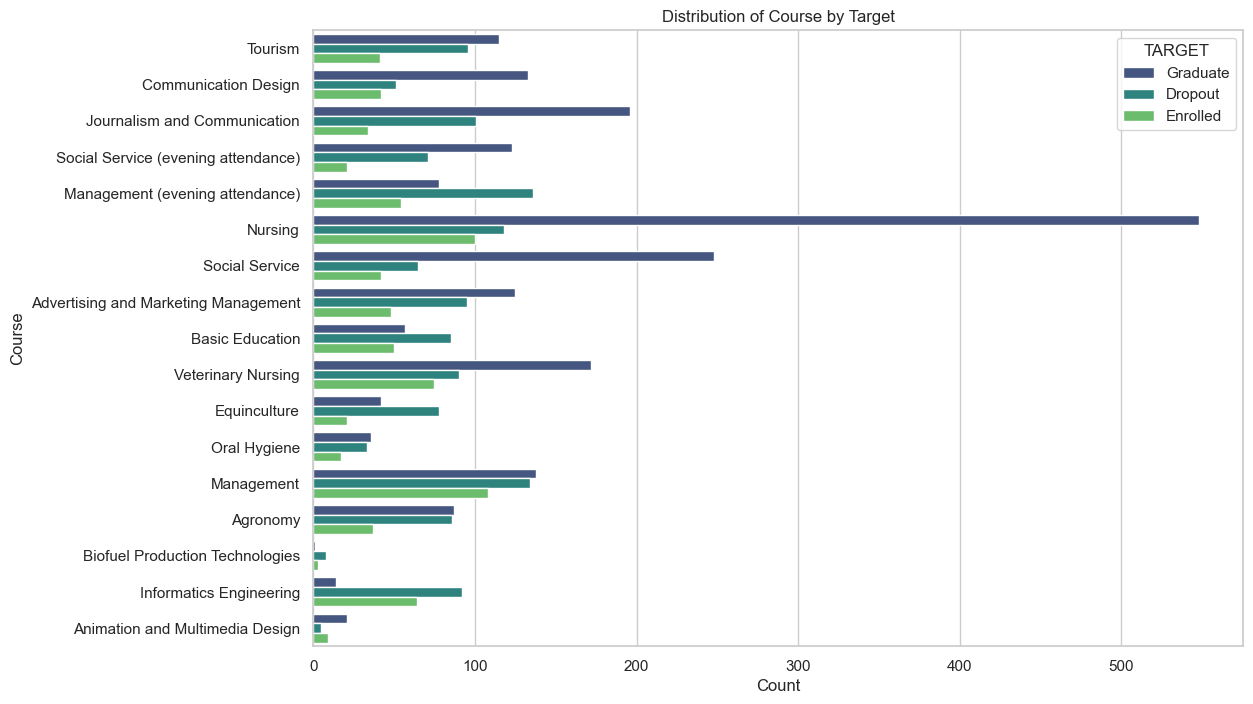

In [31]:
import seaborn as sns

# Import necessary libraries
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the target variable --> add standard deviation lines to this
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plot the distribution of age at enrollment
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='AGE_AT_ENROLLMENT', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Age at Enrollment by Target')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()

# Plot the distribution of admission grade
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='ADMISSION_GRADE', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Admission Grade by Target')
plt.xlabel('Admission Grade')
plt.ylabel('Count')
plt.show()

# Plot the distribution of previous qualification grade
plt.figure(figsize=(8, 6))
sns.histplot(data=data_vis, x='PREVIOUS_QUALIFICATION_GRADE', hue='TARGET', multiple='stack', palette='viridis')
plt.title('Distribution of Previous Qualification Grade by Target')
plt.xlabel('Previous Qualification Grade')
plt.ylabel('Count')
plt.show()

# Plot the distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', hue='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot the distribution of course
plt.figure(figsize=(12, 8))
sns.countplot(y='COURSE', hue='TARGET', data=data_vis, palette='viridis')
plt.title('Distribution of Course by Target')
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()

### Graphs etc

Bar Graphs

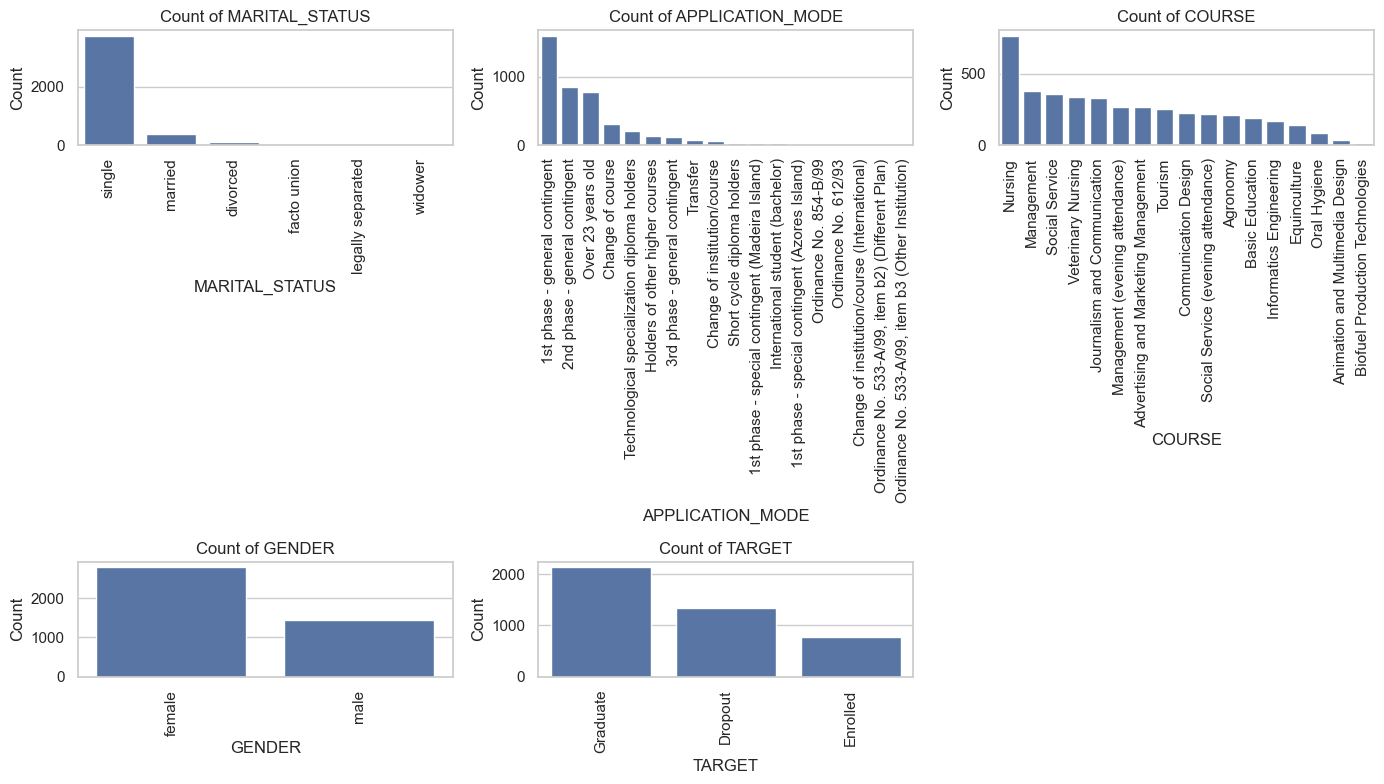

In [32]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot bar charts for some categorical columns
categorical_columns_to_plot = ['MARITAL_STATUS', 'APPLICATION_MODE', 'COURSE', 'GENDER', 'TARGET']

for i, col in enumerate(categorical_columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data_vis, x=col, order=data_vis[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

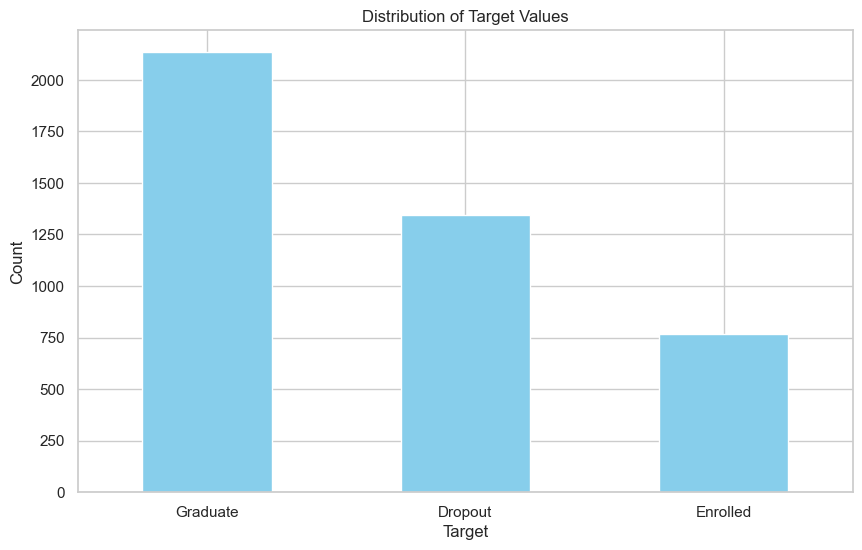

In [33]:
# Count the occurrences of each target value
target_counts = data['TARGET'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [34]:
# Group the data by 'TARGET' and count the occurrences of each category
target_counts = data['TARGET'].value_counts().reset_index()
target_counts.columns = ['TARGET', 'Count']

# Display the prepared data
print(target_counts)

     TARGET  Count
0  Graduate   2134
1   Dropout   1344
2  Enrolled    766


Histograms

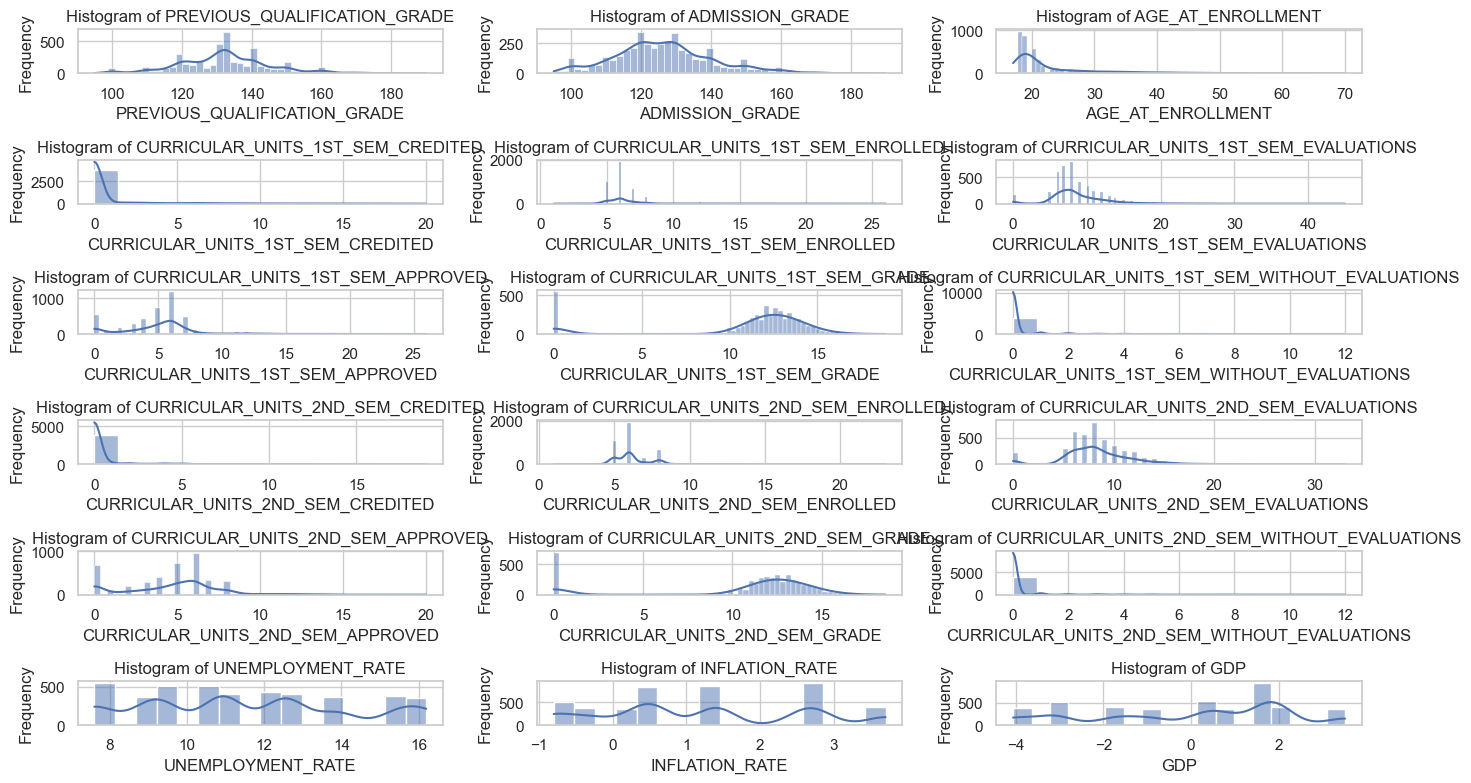

In [35]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot histograms for continuous columns
continuous_columns_to_plot = [
    'PREVIOUS_QUALIFICATION_GRADE', 'ADMISSION_GRADE', 'AGE_AT_ENROLLMENT',
    'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
    'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED',
    'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
    'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
    'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED',
    'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS',
    'UNEMPLOYMENT_RATE', 'INFLATION_RATE', 'GDP'
]

for i, col in enumerate(continuous_columns_to_plot, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Scatterplots

In [36]:
# Define the essential continuous columns to plot
essential_continuous_columns = [
    'ADMISSION_GRADE', 
    'AGE_AT_ENROLLMENT', 
    'CURRICULAR_UNITS_1ST_SEM_GRADE', 
    'CURRICULAR_UNITS_2ND_SEM_GRADE', 
    'UNEMPLOYMENT_RATE', 
    'INFLATION_RATE', 
    'GDP'
]

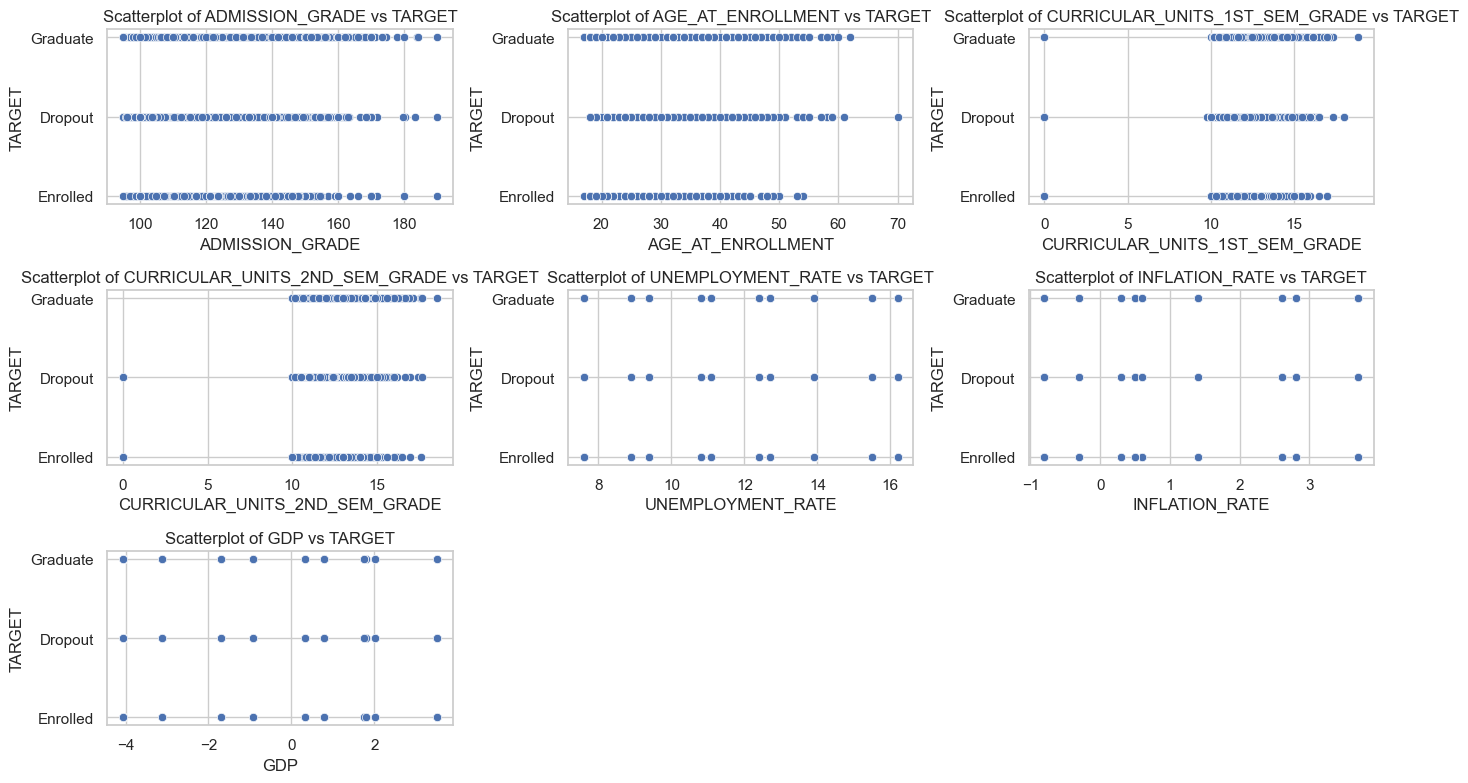

In [37]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot scatterplots for essential continuous columns against the target variable
for i, col in enumerate(essential_continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=col, y='TARGET')
    plt.title(f'Scatterplot of {col} vs TARGET')
    plt.xlabel(col)
    plt.ylabel('TARGET')

plt.tight_layout()
plt.show()

Boxplots

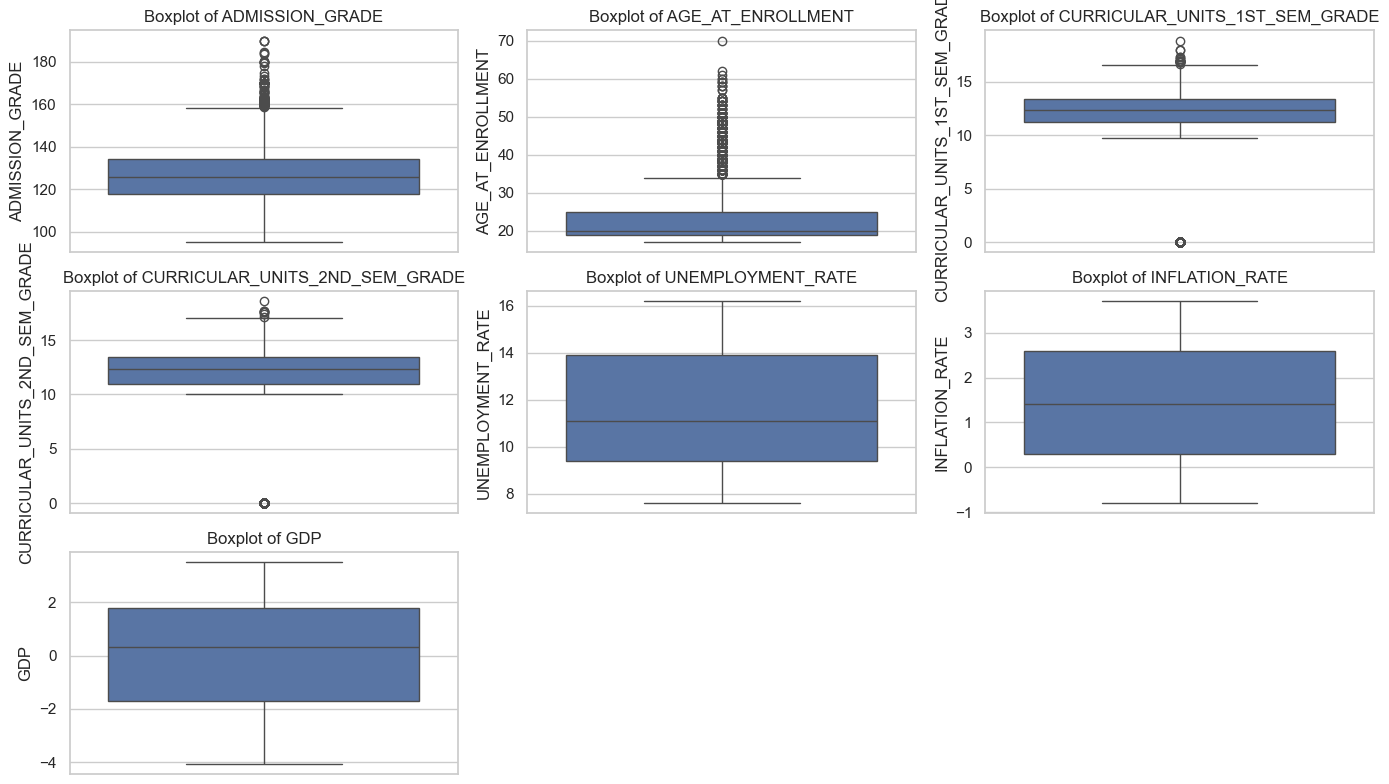

In [38]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot boxplots for the essential continuous columns
for i, col in enumerate(essential_continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_2448\1436877302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='ADMISSION_GRADE', data=data_vis, palette='viridis')


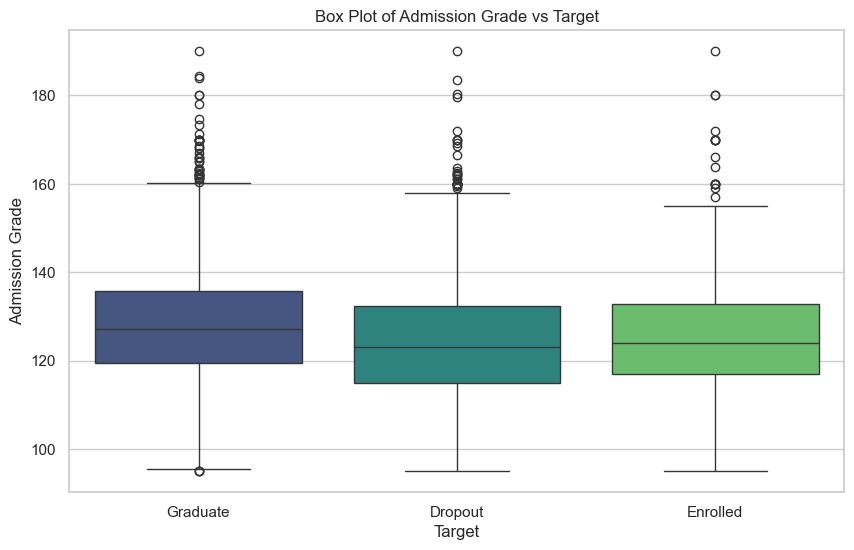

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='ADMISSION_GRADE', data=data_vis, palette='viridis')
plt.title('Box Plot of Admission Grade vs Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()

Correlation Matrix

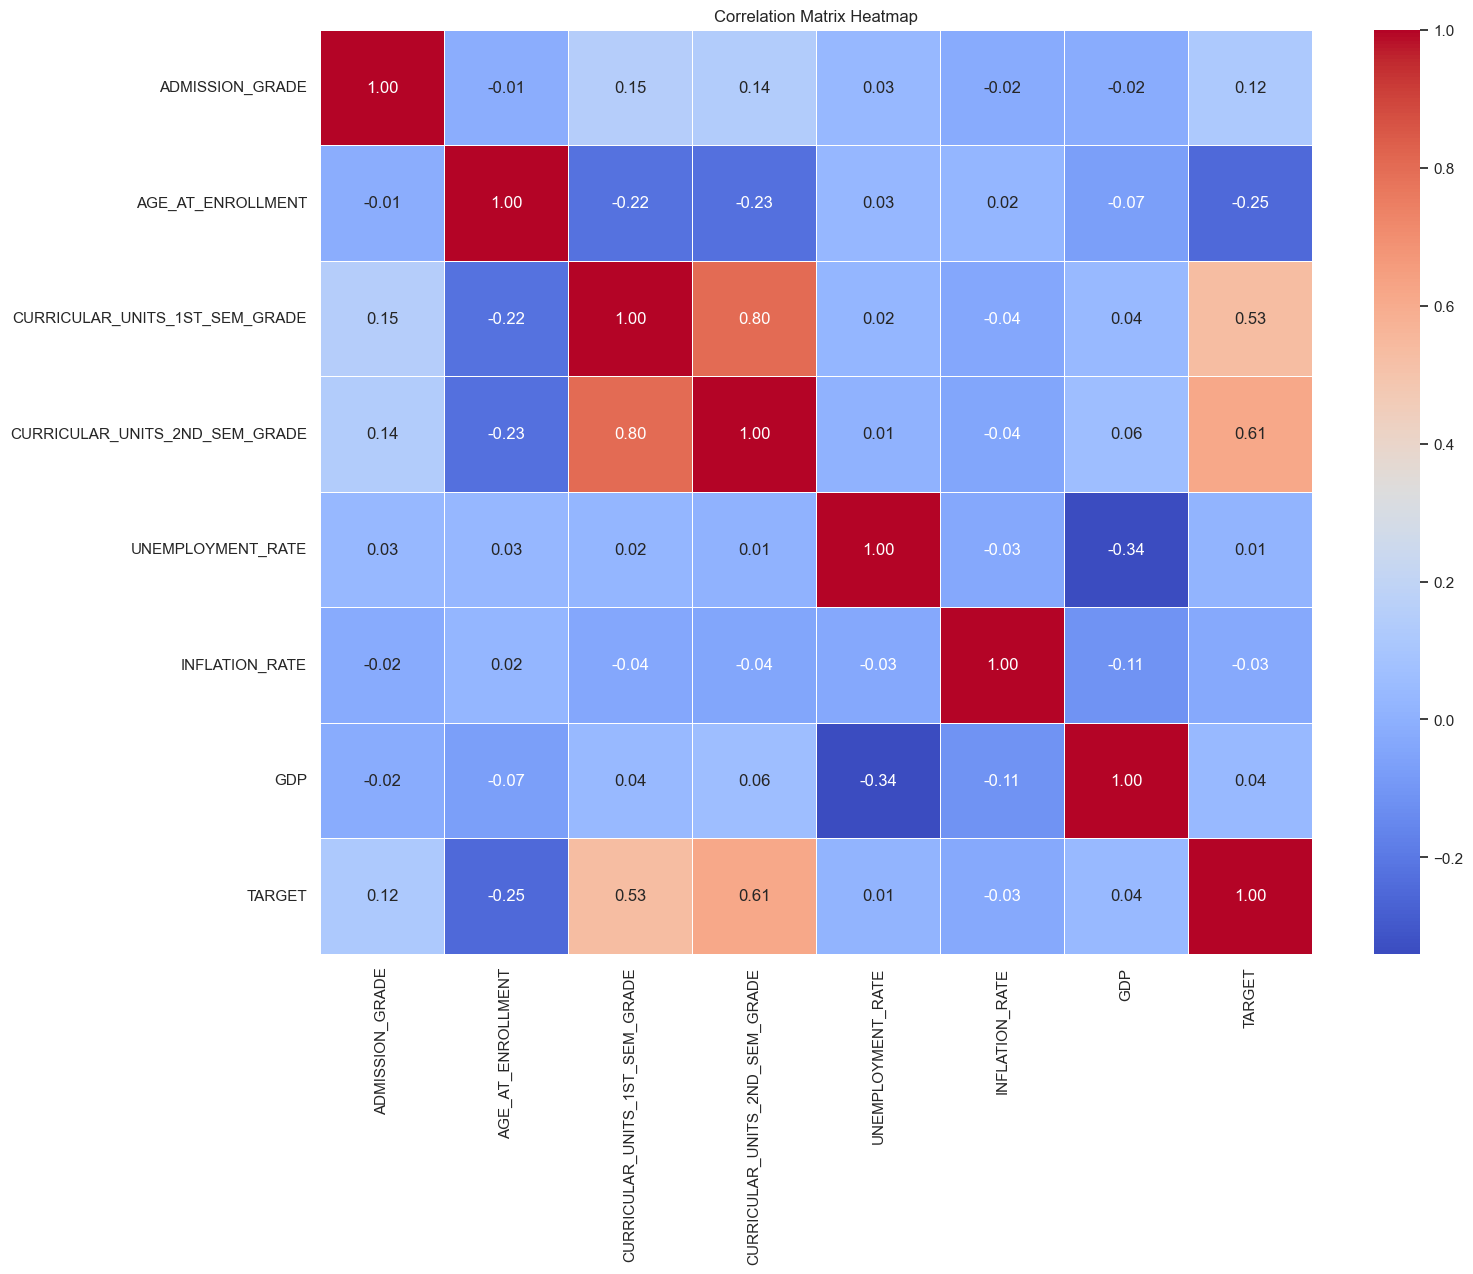

In [40]:
# Encode the TARGET column into numerical values
data_encoded = data.copy()
data_encoded['TARGET'] = data_encoded['TARGET'].map({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})

# Drop the 'AGE_GROUP_AT_ENROLLMENT' column as it contains string values
data_encoded = data_encoded.drop(columns=['AGE_GROUP_AT_ENROLLMENT'])

# Calculate the correlation matrix
corr_matrix = data_encoded[essential_continuous_columns + ['TARGET']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

### Correlation

In [41]:
correlation = data['ADMISSION_GRADE'].corr(data['AGE_AT_ENROLLMENT'])
print(f"Correlation between ADMISSION_GRADE and AGE_AT_ENROLLMENT: {correlation}")

Correlation between ADMISSION_GRADE and AGE_AT_ENROLLMENT: -0.014784455603666216


In [42]:
# Calculate Pearson correlation coefficient
pearson_corr = data[continuous_columns].corr(method='pearson')
print("Pearson Correlation Coefficient:")
print(pearson_corr)

Pearson Correlation Coefficient:
                                              PREVIOUS_QUALIFICATION_GRADE  \
PREVIOUS_QUALIFICATION_GRADE                                      1.000000   
ADMISSION_GRADE                                                   0.567143   
AGE_AT_ENROLLMENT                                                -0.101772   
CURRICULAR_UNITS_1ST_SEM_CREDITED                                -0.003505   
CURRICULAR_UNITS_1ST_SEM_ENROLLED                                 0.020397   
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS                             -0.039011   
CURRICULAR_UNITS_1ST_SEM_APPROVED                                 0.082645   
CURRICULAR_UNITS_1ST_SEM_GRADE                                    0.114992   
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS                     -0.000305   
CURRICULAR_UNITS_2ND_SEM_CREDITED                                -0.013782   
CURRICULAR_UNITS_2ND_SEM_ENROLLED                                 0.025481   
CURRICULAR_UNITS_2ND_SEM_EVALUA

In [43]:
# Calculate Spearman rank correlation coefficient
spearman_corr = data[continuous_columns].corr(method='spearman')
print("\nSpearman Rank Correlation Coefficient:")
print(spearman_corr)


Spearman Rank Correlation Coefficient:
                                              PREVIOUS_QUALIFICATION_GRADE  \
PREVIOUS_QUALIFICATION_GRADE                                      1.000000   
ADMISSION_GRADE                                                   0.576008   
AGE_AT_ENROLLMENT                                                -0.130900   
CURRICULAR_UNITS_1ST_SEM_CREDITED                                 0.016039   
CURRICULAR_UNITS_1ST_SEM_ENROLLED                                 0.070501   
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS                             -0.046674   
CURRICULAR_UNITS_1ST_SEM_APPROVED                                 0.126786   
CURRICULAR_UNITS_1ST_SEM_GRADE                                    0.223428   
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS                      0.007933   
CURRICULAR_UNITS_2ND_SEM_CREDITED                                 0.004194   
CURRICULAR_UNITS_2ND_SEM_ENROLLED                                 0.071558   
CURRICULAR_UNITS_2ND_SEM

In [44]:
# Calculate Kendall's tau correlation coefficient
kendall_corr = data[continuous_columns].corr(method='kendall')
print("Kendall's Tau Correlation Coefficient:")
print(kendall_corr)

Kendall's Tau Correlation Coefficient:
                                              PREVIOUS_QUALIFICATION_GRADE  \
PREVIOUS_QUALIFICATION_GRADE                                      1.000000   
ADMISSION_GRADE                                                   0.440850   
AGE_AT_ENROLLMENT                                                -0.094406   
CURRICULAR_UNITS_1ST_SEM_CREDITED                                 0.013215   
CURRICULAR_UNITS_1ST_SEM_ENROLLED                                 0.054573   
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS                             -0.033538   
CURRICULAR_UNITS_1ST_SEM_APPROVED                                 0.091769   
CURRICULAR_UNITS_1ST_SEM_GRADE                                    0.156220   
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS                      0.006538   
CURRICULAR_UNITS_2ND_SEM_CREDITED                                 0.003586   
CURRICULAR_UNITS_2ND_SEM_ENROLLED                                 0.055426   
CURRICULAR_UNITS_2ND_SEM_

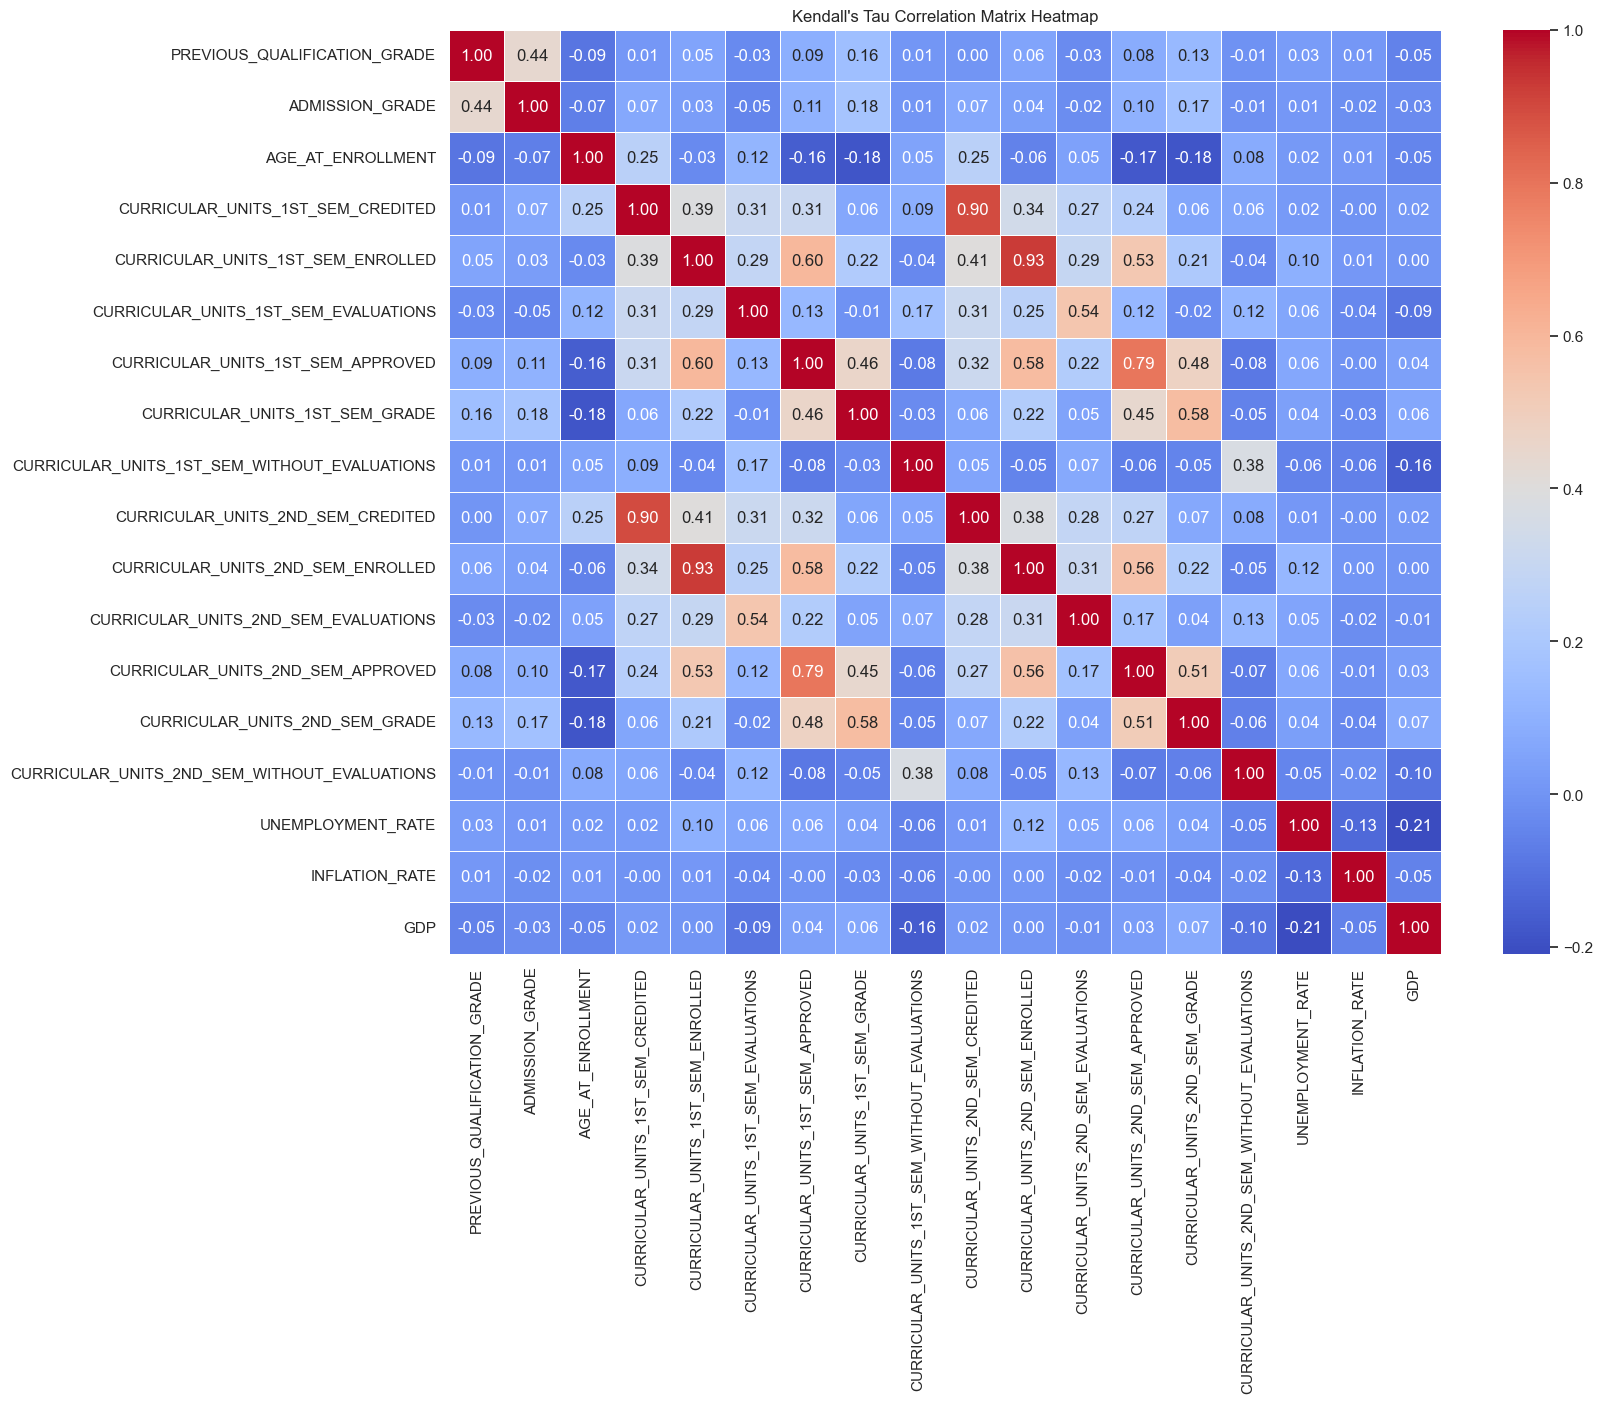

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title
plt.title("Kendall's Tau Correlation Matrix Heatmap")

# Show the plot
plt.show()

### Visualise Text

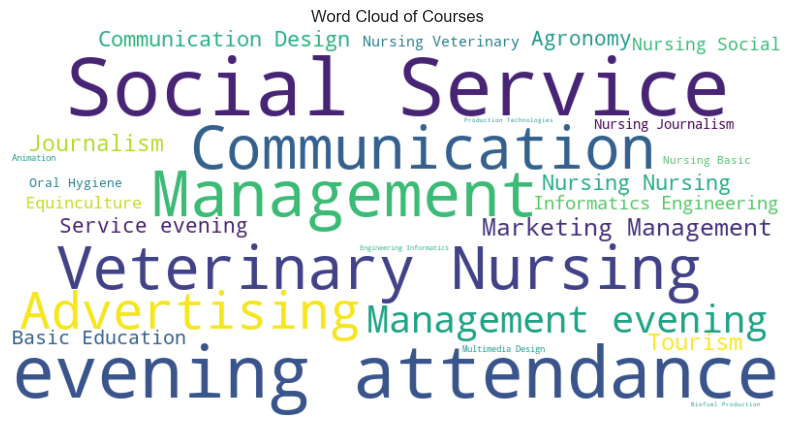

In [46]:
from wordcloud import WordCloud

# Combine all course names into a single string
text = ' '.join(data_vis['COURSE'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Courses')
plt.show()

## Statistics

###  Chi-square test

In [47]:
from scipy.stats import chi2_contingency

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(data_vis['TARGET'], data_vis['COURSE'])

# Perform the chi-square test for homogeneity
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 560.1130582746894
P-value: 9.74980445050242e-98
Degrees of freedom: 32
Expected frequencies:
[[ 84.87087653  66.50329877  11.08388313  60.80301602   3.8001885
   71.57021678  44.65221489  53.83600377 104.82186616 120.33930254
   84.87087653 242.57869934  27.23468426 112.42224317  68.08671065
   79.80395853 106.72196041]
 [ 48.37134779  37.90292177   6.31715363  34.65409991   2.16588124
   40.79076343  25.44910462  30.68331762  59.74222432  68.5862394
   48.37134779 138.25541942  15.52214892  64.0739868   38.80537229
   45.48350613  60.82516494]
 [134.75777568 105.59377945  17.59896324  96.54288407   6.03393025
  113.63901979  70.89868049  85.48067861 166.43590952 191.07445806
  134.75777568 385.16588124  43.24316682 178.50377003 108.10791706
  126.71253534 169.45287465]]


In [48]:
from scipy.stats import chi2_contingency

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(data_vis['TARGET'], data_vis['GENDER'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 238.0372567778722
P-value: 2.0458154166207883e-52
Degrees of freedom: 2
Expected frequencies:
[[ 883.2271442   460.7728558 ]
 [ 503.38689915  262.61310085]
 [1402.38595664  731.61404336]]


In [49]:
from scipy.stats import chisquare

# Observed frequencies (from target_counts)
observed = target_counts['Count']

# Expected frequencies (assuming equal distribution)
expected = [rows_count_after / len(target_counts)] * len(target_counts)

# Perform the Chi-Square goodness-of-fit test
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 666.7313854853911
P-value: 1.6638692131460047e-145


In [50]:
contingency_table = pd.crosstab(data_vis['TARGET'], data_vis['COURSE'])
print(contingency_table)

COURSE    Advertising and Marketing Management  Agronomy  \
TARGET                                                     
Dropout                                     95        86   
Enrolled                                    48        37   
Graduate                                   125        87   

COURSE    Animation and Multimedia Design  Basic Education  \
TARGET                                                       
Dropout                                 5               85   
Enrolled                                9               50   
Graduate                               21               57   

COURSE    Biofuel Production Technologies  Communication Design  Equinculture  \
TARGET                                                                          
Dropout                                 8                    51            78   
Enrolled                                3                    42            21   
Graduate                                1                   133 

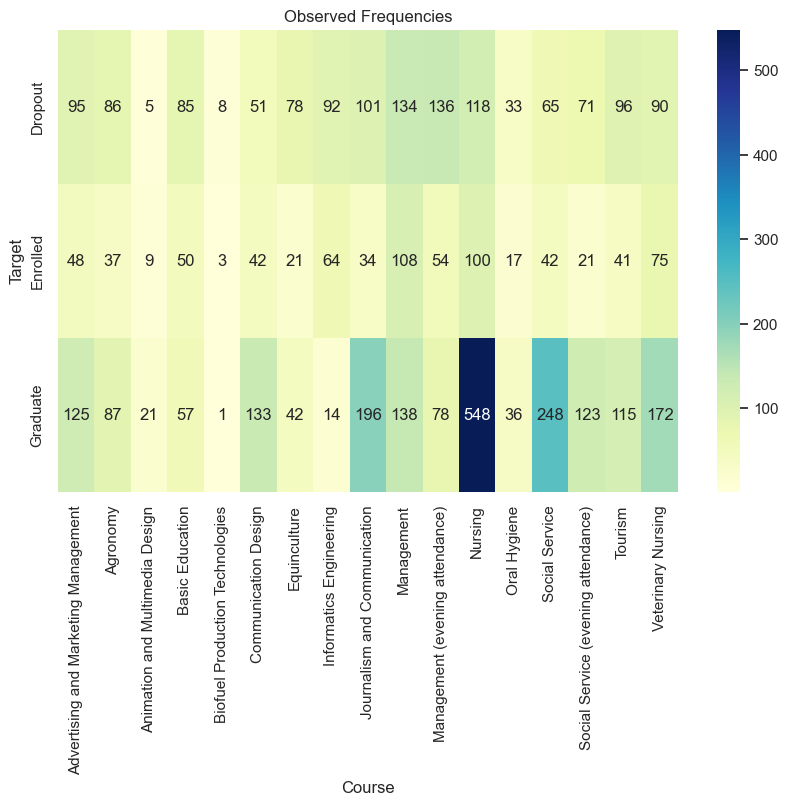

In [51]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a heatmap for the observed frequencies
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Observed Frequencies")
plt.xlabel("Course")
plt.ylabel("Target")
plt.show()


In [52]:
# # Create a heatmap for the expected frequencies

# plt.figure(figsize=(10, 6))
# sns.heatmap(expected, annot=True, fmt=".2f", cmap="YlGnBu")
# plt.title("Expected Frequencies")
# plt.xlabel("Course")
# plt.ylabel("Target")
# plt.show()



<Figure size 1000x600 with 0 Axes>

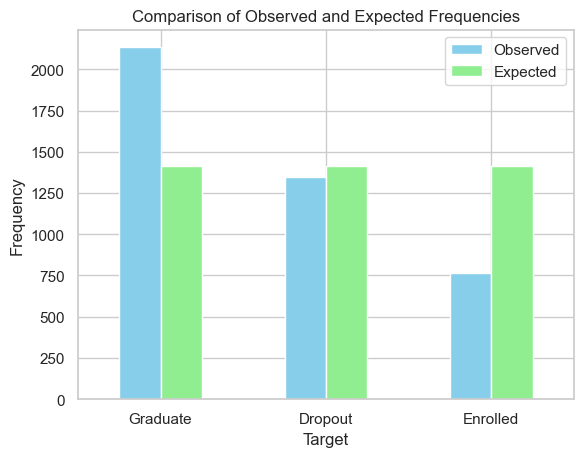

In [53]:
# Create a DataFrame for observed and expected frequencies
observed_expected_df = pd.DataFrame({
    'Observed': observed,
    'Expected': expected
})

# Plot the observed and expected frequencies
plt.figure(figsize=(10, 6))
observed_expected_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Comparison of Observed and Expected Frequencies')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(target_counts)), labels=target_counts['TARGET'], rotation=0)
plt.legend(['Observed', 'Expected'])
plt.show()

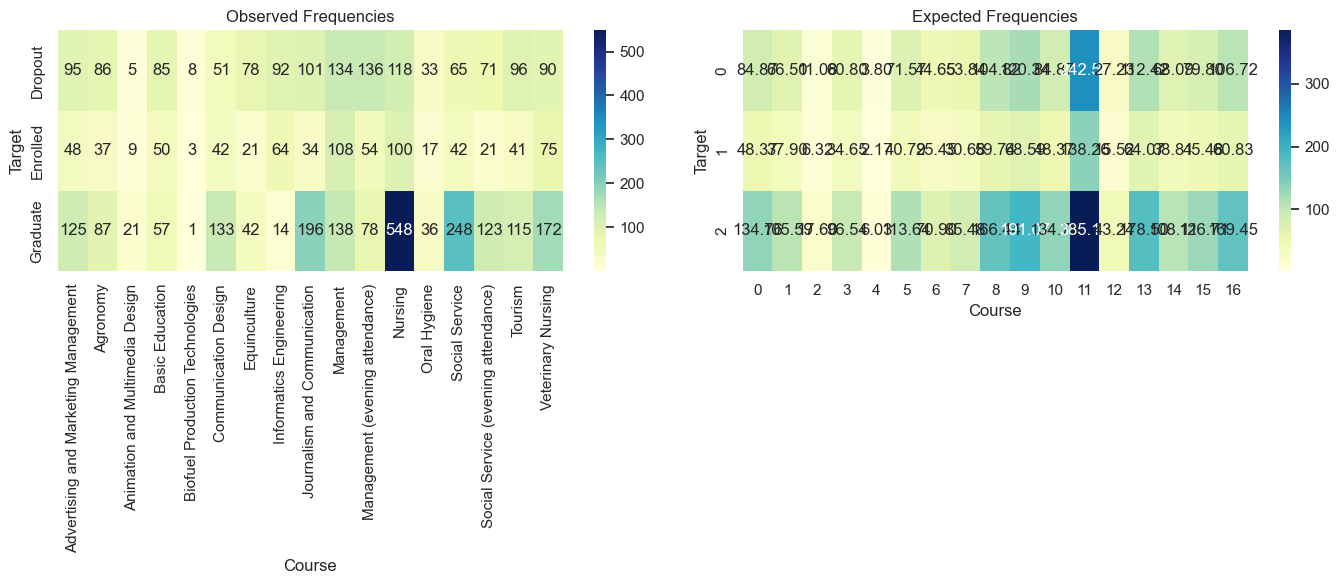

In [54]:
import seaborn as sns
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(data_vis['TARGET'], data_vis['COURSE'])

# Perform the chi-square test for homogeneity
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create a heatmap for the observed frequencies
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Observed Frequencies")
plt.xlabel("Course")
plt.ylabel("Target")

# Create a heatmap for the expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(expected, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Expected Frequencies")
plt.xlabel("Course")
plt.ylabel("Target")

plt.tight_layout()
plt.show()



Complete the following tasks using the dataset you have selected:

1) Develop two interesting research hypotheses that involve nominal variables, and so are suitable for a Chi-square test. For each hypothesis, clearly formulate the null hypothesis (H0) and alternative hypothesis (H1). 

2) Conduct Chi-square tests to assesses the two hypotheses you have formulated. What do you conclude?

In [55]:
# ### Hypothesis 1: Relationship between Gender and Target (Outcome)
# - **Null Hypothesis (H0):** There is no relationship between a student's gender and their academic outcome (target).
# - **Alternative Hypothesis (H1):** There is a relationship between a student's gender and their academic outcome (target).

# ### Hypothesis 2: Relationship between Course and Target (Outcome)
# - **Null Hypothesis (H0):** There is no relationship between the course a student is enrolled in and their academic outcome (target).
# - **Alternative Hypothesis (H1):** There is a relationship between the course a student is enrolled in and their academic outcome (target).

In [56]:
from scipy.stats import chi2_contingency

# Define the significance level
alpha = 0.05

# Hypothesis 1: Relationship between Gender and Target (Outcome)
contingency_table_gender = pd.crosstab(data_vis['TARGET'], data_vis['GENDER'])
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)

print("Hypothesis 1: Relationship between Gender and Target (Outcome)")
print(f"Chi-square statistic: {chi2_gender}")
print(f"P-value: {p_gender}")
print(f"Degrees of freedom: {dof_gender}")
print("Expected frequencies:")
print(expected_gender)
if p_gender < alpha:
    print("Reject the null hypothesis (H0). There is a significant relationship between Gender and Target (Outcome).")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between Gender and Target (Outcome).")
print("\n")



Hypothesis 1: Relationship between Gender and Target (Outcome)
Chi-square statistic: 238.0372567778722
P-value: 2.0458154166207883e-52
Degrees of freedom: 2
Expected frequencies:
[[ 883.2271442   460.7728558 ]
 [ 503.38689915  262.61310085]
 [1402.38595664  731.61404336]]
Reject the null hypothesis (H0). There is a significant relationship between Gender and Target (Outcome).




In [57]:
from scipy.stats import chi2_contingency

# Hypothesis 2: Relationship between Course and Target (Outcome)
contingency_table_course = pd.crosstab(data_vis['TARGET'], data_vis['COURSE'])
chi2_course, p_course, dof_course, expected_course = chi2_contingency(contingency_table_course)

print("Hypothesis 2: Relationship between Course and Target (Outcome)")
print(f"Chi-square statistic: {chi2_course}")
print(f"P-value: {p_course}")
print(f"Degrees of freedom: {dof_course}")
print("Expected frequencies:")
print(expected_course)
if p_course < alpha:
    print("Reject the null hypothesis (H0). There is a significant relationship between Course and Target (Outcome).")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between Course and Target (Outcome).")

Hypothesis 2: Relationship between Course and Target (Outcome)
Chi-square statistic: 560.1130582746894
P-value: 9.74980445050242e-98
Degrees of freedom: 32
Expected frequencies:
[[ 84.87087653  66.50329877  11.08388313  60.80301602   3.8001885
   71.57021678  44.65221489  53.83600377 104.82186616 120.33930254
   84.87087653 242.57869934  27.23468426 112.42224317  68.08671065
   79.80395853 106.72196041]
 [ 48.37134779  37.90292177   6.31715363  34.65409991   2.16588124
   40.79076343  25.44910462  30.68331762  59.74222432  68.5862394
   48.37134779 138.25541942  15.52214892  64.0739868   38.80537229
   45.48350613  60.82516494]
 [134.75777568 105.59377945  17.59896324  96.54288407   6.03393025
  113.63901979  70.89868049  85.48067861 166.43590952 191.07445806
  134.75777568 385.16588124  43.24316682 178.50377003 108.10791706
  126.71253534 169.45287465]]
Reject the null hypothesis (H0). There is a significant relationship between Course and Target (Outcome).


### Comparing Means

In [58]:
from scipy.stats import mannwhitneyu

# Extract the ADMISSION_GRADE for the two groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(graduate_grades, dropout_grades)

# Print the results
print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of Graduates and Dropouts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the ADMISSION_GRADE of Graduates and Dropouts.")

Mann-Whitney U statistic: 1656887.5
P-value: 1.0886510035702595e-14
Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of Graduates and Dropouts.


In [59]:
# p-hacking (for illustration only)

In [60]:
# Calculate the sample means for the continuous columns
sample_means = data[continuous_columns].mean()

# Display the sample means
print("Sample Means for Continuous Columns:")
print(sample_means)

Sample Means for Continuous Columns:
PREVIOUS_QUALIFICATION_GRADE                    132.373115
ADMISSION_GRADE                                 126.607163
AGE_AT_ENROLLMENT                                23.397738
CURRICULAR_UNITS_1ST_SEM_CREDITED                 0.740104
CURRICULAR_UNITS_1ST_SEM_ENROLLED                 6.536522
CURRICULAR_UNITS_1ST_SEM_EVALUATIONS              8.651037
CURRICULAR_UNITS_1ST_SEM_APPROVED                 4.906221
CURRICULAR_UNITS_1ST_SEM_GRADE                   11.092129
CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS      0.143497
CURRICULAR_UNITS_2ND_SEM_CREDITED                 0.564797
CURRICULAR_UNITS_2ND_SEM_ENROLLED                 6.496466
CURRICULAR_UNITS_2ND_SEM_EVALUATIONS              8.405278
CURRICULAR_UNITS_2ND_SEM_APPROVED                 4.623940
CURRICULAR_UNITS_2ND_SEM_GRADE                   10.664098
CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS      0.156692
UNEMPLOYMENT_RATE                                11.560839
INFLATION_RATE     

#### Test for differences

In [61]:
from scipy.stats import f_oneway

# Extract the ADMISSION_GRADE for the three groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']
enrolled_grades = data[data['TARGET'] == 'Enrolled']['ADMISSION_GRADE']

# Perform the one-way ANOVA test
f_stat, p_value = f_oneway(graduate_grades, dropout_grades, enrolled_grades)

# Print the results
print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the groups.")

ANOVA F-statistic: 33.78909388384963
P-value: 2.7622968754435683e-15
Reject the null hypothesis. There is a significant difference between the means of the groups.


#### check ANOVA assumptions

In [62]:
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt

# Extract the ADMISSION_GRADE for the three groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']
enrolled_grades = data[data['TARGET'] == 'Enrolled']['ADMISSION_GRADE']

# 1. Check for normality using the Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality")
print("-------------------------------")
shapiro_graduate = stats.shapiro(graduate_grades)
shapiro_dropout = stats.shapiro(dropout_grades)
shapiro_enrolled = stats.shapiro(enrolled_grades)
print(f"Graduate: W={shapiro_graduate[0]}, p-value={shapiro_graduate[1]}")
print(f"Dropout: W={shapiro_dropout[0]}, p-value={shapiro_dropout[1]}")
print(f"Enrolled: W={shapiro_enrolled[0]}, p-value={shapiro_enrolled[1]}")



Shapiro-Wilk Test for Normality
-------------------------------
Graduate: W=0.9781746629344314, p-value=1.501620497058287e-17
Dropout: W=0.9789571189360896, p-value=4.2054131147577414e-13
Enrolled: W=0.9739424754196533, p-value=1.9003821781600713e-10


In [63]:
# 2. Check for homogeneity of variances using Levene's test
print("\nLevene's Test for Homogeneity of Variances")
print("-----------------------------------------")
levene_test = stats.levene(graduate_grades, dropout_grades, enrolled_grades)
print(f"Levene's test statistic: {levene_test[0]}, p-value: {levene_test[1]}")


Levene's Test for Homogeneity of Variances
-----------------------------------------
Levene's test statistic: 7.4495036389931295, p-value: 0.0005893744584995193



Q-Q Plots for Normality
-----------------------


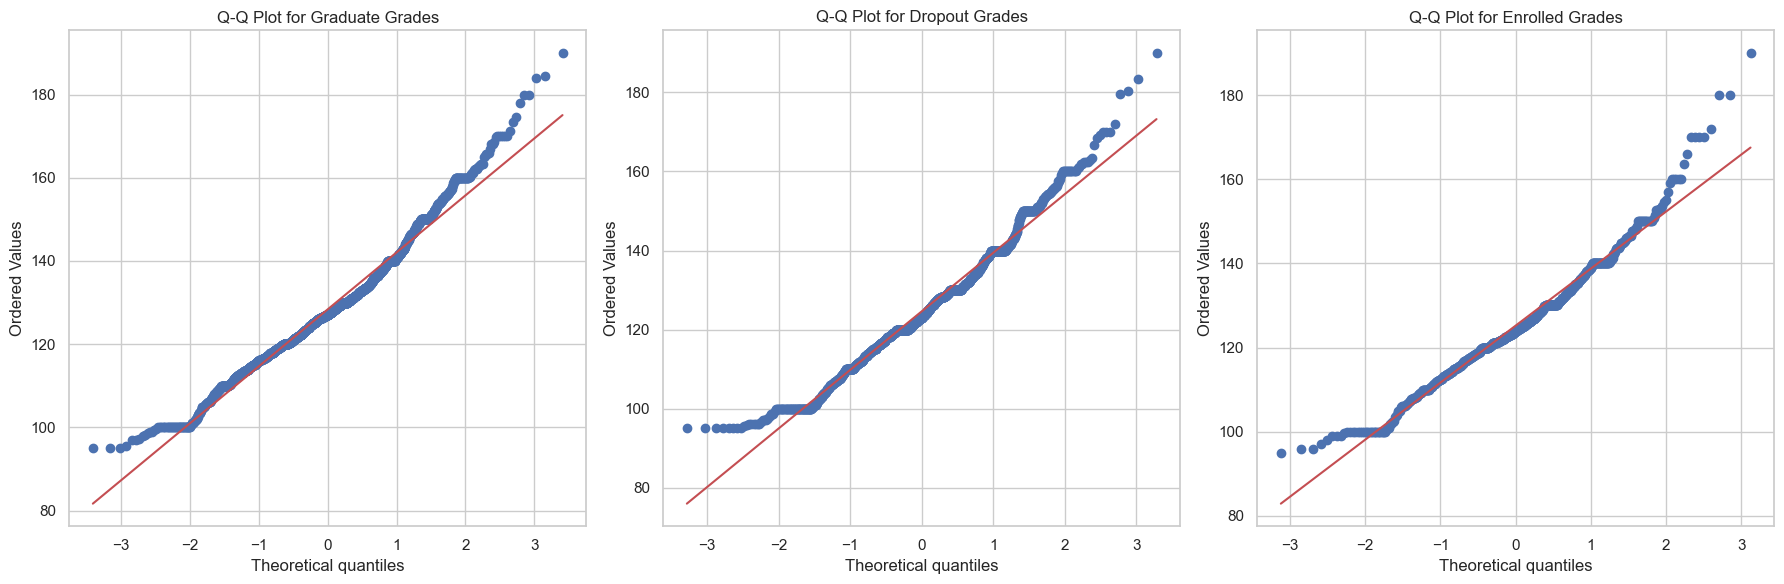

In [64]:
# 3. Visual inspection of normality using Q-Q plots
print("\nQ-Q Plots for Normality")
print("-----------------------")
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
stats.probplot(graduate_grades, dist="norm", plot=plt)
plt.title('Q-Q Plot for Graduate Grades')

plt.subplot(1, 3, 2)
stats.probplot(dropout_grades, dist="norm", plot=plt)
plt.title('Q-Q Plot for Dropout Grades')

plt.subplot(1, 3, 3)
stats.probplot(enrolled_grades, dist="norm", plot=plt)
plt.title('Q-Q Plot for Enrolled Grades')

plt.tight_layout()
plt.show()


Boxplots for Homogeneity of Variances
-------------------------------------


C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_2448\4188616630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='ADMISSION_GRADE', data=data, palette='viridis')


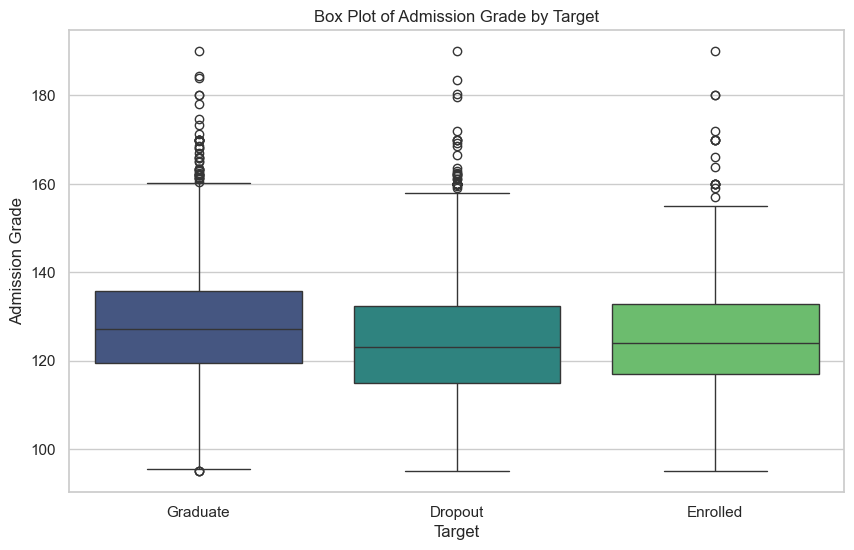

In [65]:
# 4. Visual inspection of homogeneity of variances using boxplots
print("\nBoxplots for Homogeneity of Variances")
print("-------------------------------------")
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='ADMISSION_GRADE', data=data, palette='viridis')
plt.title('Box Plot of Admission Grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()

C:\Users\aidan_1k98io6\AppData\Local\Temp\ipykernel_2448\1941545343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TARGET', y='ADMISSION_GRADE', data=data_vis, palette='viridis')


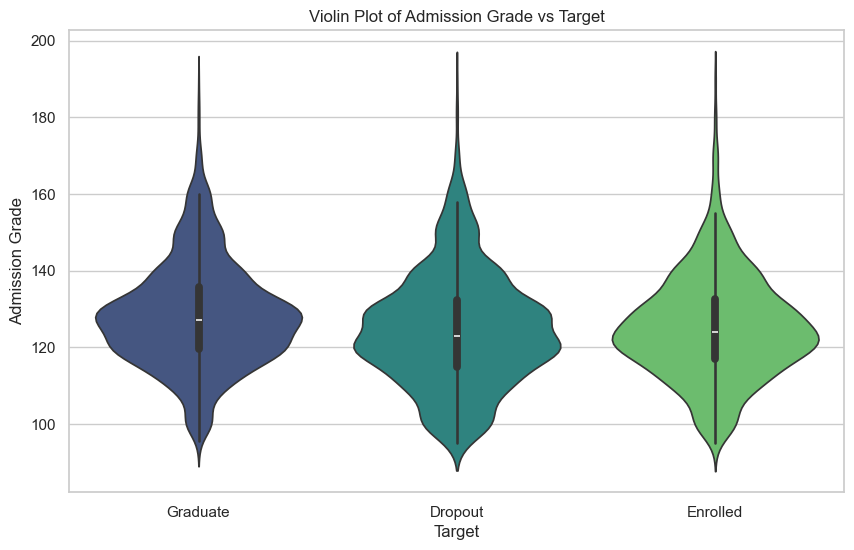

In [66]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a violin plot for ADMISSION_GRADE vs TARGET
plt.figure(figsize=(10, 6))
sns.violinplot(x='TARGET', y='ADMISSION_GRADE', data=data_vis, palette='viridis')
plt.title('Violin Plot of Admission Grade vs Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()

In [67]:
from scipy.stats import bartlett

# Extract the ADMISSION_GRADE for the three groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']
enrolled_grades = data[data['TARGET'] == 'Enrolled']['ADMISSION_GRADE']

# Perform Bartlett's test
bartlett_test = bartlett(graduate_grades, dropout_grades, enrolled_grades)

# Print the results
print(f"Bartlett's test statistic: {bartlett_test.statistic}")
print(f"P-value: {bartlett_test.pvalue}")

# Interpret the result
alpha = 0.05
if bartlett_test.pvalue < alpha:
    print("Reject the null hypothesis. The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. The variances are not significantly different.")

Bartlett's test statistic: 12.333407633430765
P-value: 0.0020981404706123395
Reject the null hypothesis. The variances are significantly different.


In [68]:
from scipy.stats import kruskal

# Extract the ADMISSION_GRADE for the three groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']
enrolled_grades = data[data['TARGET'] == 'Enrolled']['ADMISSION_GRADE']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(graduate_grades, dropout_grades, enrolled_grades)

# Print the results
print(f"Kruskal-Wallis H statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the ADMISSION_GRADE of the groups.")

Kruskal-Wallis H statistic: 70.34319578819384
P-value: 5.31091211625119e-16
Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of the groups.


In [69]:
from scipy.stats import ttest_ind

# Extract the ADMISSION_GRADE for the two groups
graduate_grades = data[data['TARGET'] == 'Graduate']['ADMISSION_GRADE']
dropout_grades = data[data['TARGET'] == 'Dropout']['ADMISSION_GRADE']

# Perform the independent t-test
t_stat, p_value = ttest_ind(graduate_grades, dropout_grades)

# Print the results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of Graduates and Dropouts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the ADMISSION_GRADE of Graduates and Dropouts.")

T-test statistic: 7.599221210580063
P-value: 3.807787717378116e-14
Reject the null hypothesis. There is a significant difference between the ADMISSION_GRADE of Graduates and Dropouts.


### Confidence Intervals

In [70]:
import numpy as np

# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Extract the ADMISSION_GRADE column
admission_grades = data['ADMISSION_GRADE'].dropna()

# Initialize an array to store the bootstrap means
bootstrap_means = np.zeros(n_bootstrap_samples)

# Perform bootstrapping
for i in range(n_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(admission_grades, size=len(admission_grades), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Print the results
print(f"Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"95% Confidence Interval: {confidence_interval}")

Bootstrap Mean: 126.61137365692743
95% Confidence Interval: [126.21013902 127.02973315]


In [71]:
from scipy import stats
import numpy as np

# Extract the ADMISSION_GRADE column
admission_grades = data['ADMISSION_GRADE']

# Calculate the mean and standard error of the mean
mean = np.mean(admission_grades)
sem = stats.sem(admission_grades)

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(admission_grades)-1, loc=mean, scale=sem)

print(f"Mean: {mean}")
print(f"95% Confidence Interval: {confidence_interval}")

Mean: 126.60716305372291
95% Confidence Interval: (126.17736104333204, 127.03696506411379)


In [72]:
# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Extract the ADMISSION_GRADE column
admission_grades = data['ADMISSION_GRADE'].dropna()

# Initialize an array to store the bootstrap medians
bootstrap_medians = np.zeros(n_bootstrap_samples)

# Perform bootstrapping
for i in range(n_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(admission_grades, size=len(admission_grades), replace=True)
    # Calculate the median of the bootstrap sample
    bootstrap_medians[i] = np.median(bootstrap_sample)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_medians, [2.5, 97.5])

# Print the results
print(f"Bootstrap Median: {np.median(bootstrap_medians)}")
print(f"95% Confidence Interval: {confidence_interval}")

Bootstrap Median: 125.8
95% Confidence Interval: [125.2 126.3]


## Supervised Learning: Linear Models

#### Prepare data for modeling

In [73]:
from sklearn.model_selection import train_test_split

# Define the feature columns and the target variable
feature_columns = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'PREVIOUS_QUALIFICATION_GRADE']  
target_column = 'TARGET'

# Split the data into training and test sets
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3395, 3)
X_test shape: (849, 3)
y_train shape: (3395,)
y_test shape: (849,)


### Simple Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.723920131319566
R-squared: 0.09195860655903909


In [75]:
# Print the intercept and slope (coefficient)
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Intercept: 0.8305208711061081
Slope: 0.00624503818952383


Mean Absolute Error (MAE): 0.7739592222423548
Root Mean Squared Error (RMSE): 0.8508349612701431


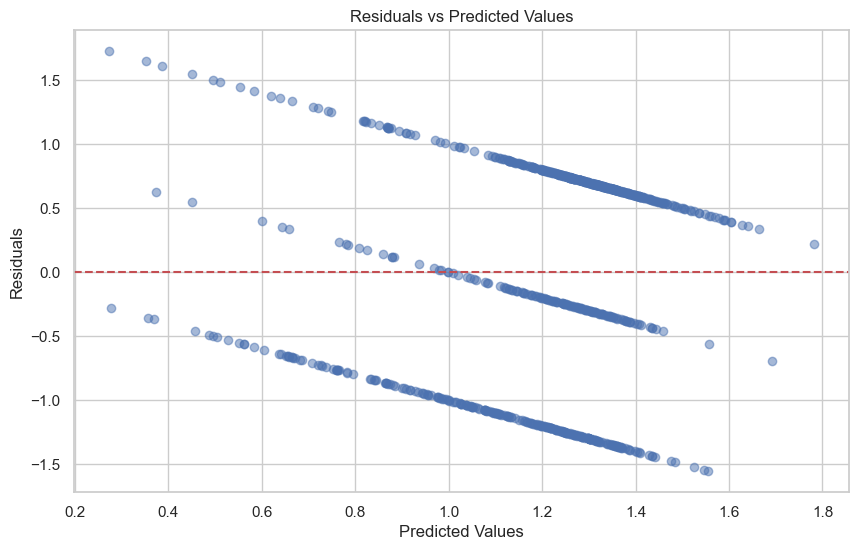

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_encoded, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred))

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the residuals
residuals = y_test_encoded - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [77]:
import numpy as np

# Calculate the standard error of the mean for the predicted values
standard_error = np.std(y_pred) / np.sqrt(len(y_pred))

print(f"Standard Error of the Mean: {standard_error}")

Standard Error of the Mean: 0.007749765325454558


In [78]:
# Calculate the mean squared error
mse = mean_squared_error(y_test_encoded, y_pred)

# Calculate the standard error
standard_error = np.sqrt(mse)

print(f"Standard Error: {standard_error}")

Standard Error: 0.8508349612701431


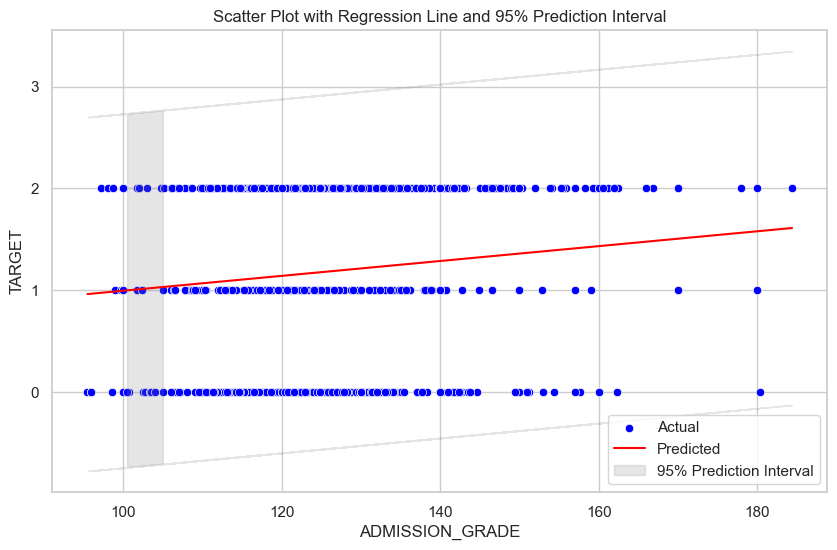

In [79]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Define the feature columns and the target variable
feature_columns = ['ADMISSION_GRADE']  # Example feature column
target_column = 'TARGET'

# Split the data into training and test sets
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the standard error of the predictions
se = np.sqrt(np.sum((y_test_encoded - y_pred) ** 2) / (len(y_test_encoded) - 2))

# Calculate the prediction interval
t_value = 1.96  # for 95% confidence interval
interval = t_value * se

# Plot the scatter plot with regression line and prediction interval
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test_encoded, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted')
plt.fill_between(X_test.squeeze(), y_pred - interval, y_pred + interval, color='gray', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('ADMISSION_GRADE')
plt.ylabel('TARGET')
plt.title('Scatter Plot with Regression Line and 95% Prediction Interval')
plt.legend()
plt.show()

### Multiple Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Define the feature columns and the target variable
feature_columns = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'PREVIOUS_QUALIFICATION_GRADE']  # Example feature columns
target_column = 'TARGET'

# Split the data into training and test sets
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Mean Squared Error: 0.723920131319566
R-squared: 0.09195860655903909
Intercept: 0.8305208711061081
Coefficients: [ 0.00624504 -0.02724148  0.00156931]


In [81]:
print(f"Number of rows in the training set: {X_train.shape[0]}")
print(f"Number of rows in the testing set: {X_test.shape[0]}")

Number of rows in the training set: 3395
Number of rows in the testing set: 849


In [82]:
import numpy as np

# Calculate the median of the predicted values
median_pred = np.median(y_pred)

# Print the result
print(f"Median of the predicted values: {median_pred}")

Median of the predicted values: 1.26265248727179


In [83]:
import numpy as np

# Calculate the standard error of the mean for the predicted values
standard_error = np.std(y_pred) / np.sqrt(len(y_pred))

print(f"Standard Error of the Mean: {standard_error}")

Standard Error of the Mean: 0.007749765325454558


In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display the class distribution before balancing
print("Class distribution before balancing:", Counter(y_train))

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

# Display the class distribution after balancing
print("Class distribution after balancing:", Counter(y_train_balanced))

Class distribution before balancing: Counter({'Graduate': 1708, 'Dropout': 1067, 'Enrolled': 620})
Class distribution after balancing: Counter({0: 1708, 2: 1708, 1: 1708})


In [85]:
# Linear Regression Accuracy

from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, y_pred.round())

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.20023557126030625


### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_logistic)
print(f"Accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test_encoded, y_pred_logistic, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_logistic)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5488810365135454
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.58      0.27      0.37       277
    Enrolled       0.00      0.00      0.00       146
    Graduate       0.54      0.92      0.68       426

    accuracy                           0.55       849
   macro avg       0.37      0.40      0.35       849
weighted avg       0.46      0.55      0.46       849

Confusion Matrix:
[[ 76   0 201]
 [ 19   0 127]
 [ 36   0 390]]


c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
# Print the intercept and coefficients
intercept = logistic_model.intercept_
coefficients = logistic_model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: [-0.14178739  0.74666251 -0.60487512]
Coefficients: [[-0.008116    0.04396583  0.00102958]
 [-0.00042198 -0.01658912 -0.00606334]
 [ 0.00853797 -0.02737671  0.00503376]]


In [88]:
# Display the first 10 predictions from the logistic regression model
print("First 10 predictions from the logistic regression model:")
print(y_pred_logistic[:10])

# Display the first 10 actual values from the test set
print("\nFirst 10 actual values from the test set:")
print(y_test_encoded[:10])

First 10 predictions from the logistic regression model:
[2 2 2 2 2 0 2 2 2 0]

First 10 actual values from the test set:
[2 1 0 0 0 2 0 0 2 2]


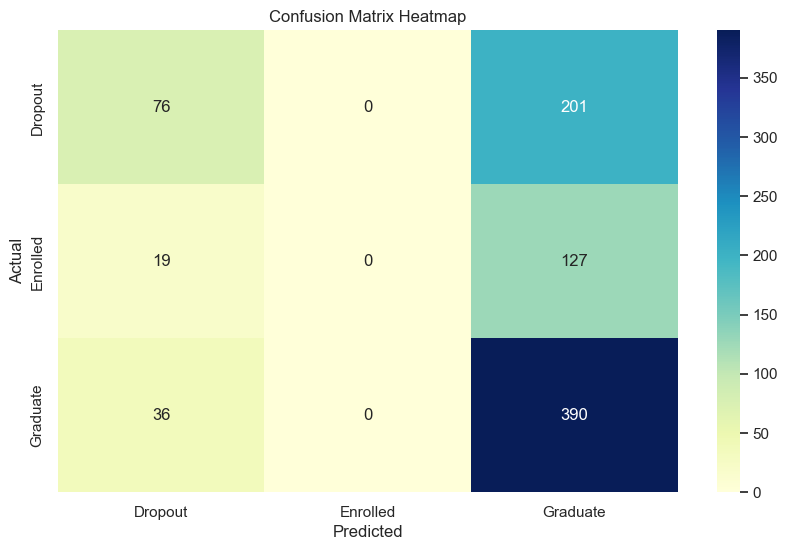

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_logistic)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the logistic regression model with the best parameters
best_logistic_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_best_logistic = best_logistic_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_best_logistic)
print(f"Accuracy with best parameters: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test_encoded, y_pred_best_logistic, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_best_logistic)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.5452135493372607
Accuracy with best parameters: 0.552414605418139
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.58      0.29      0.39       277
    Enrolled       0.00      0.00      0.00       146
    Graduate       0.55      0.91      0.68       426

    accuracy                           0.55       849
   macro avg       0.38      0.40      0.36       849
weighted avg       0.46      0.55      0.47       849

Confusion Matrix:
[[ 80   0 197]
 [ 21   0 125]
 [ 37   0 389]]


c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
975 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in

In [91]:
# Print the grid search results
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

# Display the top 10 results
print("Top 10 Grid Search Results:")
print(results[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']].head(10))

Top 10 Grid Search Results:
     rank_test_score  mean_test_score  std_test_score  \
147                1         0.545214        0.009193   
127                1         0.545214        0.009193   
167                1         0.545214        0.009193   
67                 4         0.544919        0.007567   
287                4         0.544919        0.008983   
202                4         0.544919        0.008331   
162                4         0.544919        0.008331   
282                4         0.544919        0.008331   
142                4         0.544919        0.008331   
242                4         0.544919        0.008331   

                                                params  
147  {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'so...  
127  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...  
167  {'C': 1, 'max_iter': 300, 'penalty': 'l2', 'so...  
67   {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...  
287  {'C': 100, 'max_iter': 300, 'penalty': 'l2', '...  
20

In [92]:
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Feature Engineering and Dealing with Imbalanced Data

### FE for continuous data

In [93]:
import numpy as np

# Apply log transformation to the ADMISSION_GRADE column
data['LOG_ADMISSION_GRADE'] = np.log(data['ADMISSION_GRADE'] + 1)  # Adding 1 to avoid log(0)

# Display the first few rows to verify the transformation
print(data[['ADMISSION_GRADE', 'LOG_ADMISSION_GRADE']].head())

   ADMISSION_GRADE  LOG_ADMISSION_GRADE
1            142.5             4.966335
2            124.8             4.834693
3            119.6             4.792479
4            141.5             4.959342
5            114.8             4.751865


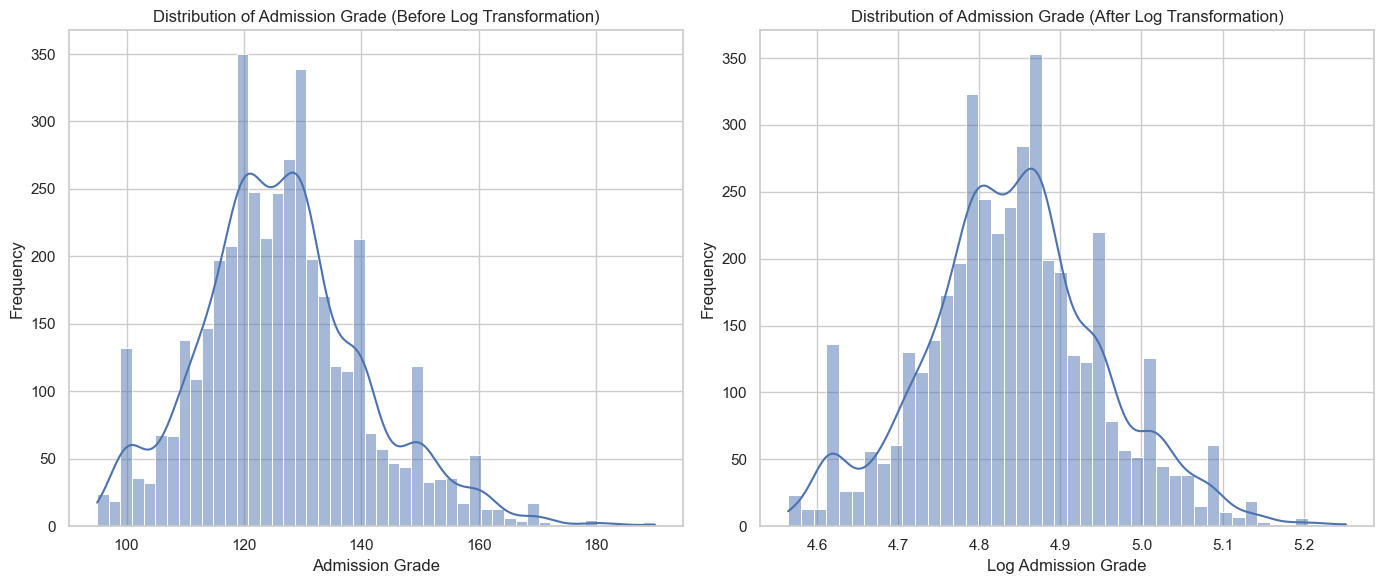

In [94]:
# visualise distribution of admission grade before and after log transformation

plt.figure(figsize=(14, 6))

# Plot the distribution of ADMISSION_GRADE before log transformation
plt.subplot(1, 2, 1)
sns.histplot(data['ADMISSION_GRADE'], kde=True)
plt.title('Distribution of Admission Grade (Before Log Transformation)')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')

# Plot the distribution of LOG_ADMISSION_GRADE after log transformation
plt.subplot(1, 2, 2)
sns.histplot(data['LOG_ADMISSION_GRADE'], kde=True)
plt.title('Distribution of Admission Grade (After Log Transformation)')
plt.xlabel('Log Admission Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define the feature columns and the target variable
feature_column = 'ADMISSION_GRADE'
log_feature_column = 'LOG_ADMISSION_GRADE'
target_column = 'TARGET'

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data[target_column])

# Split the data into training and test sets for both original and log-transformed features
X_train, X_test, y_train, y_test = train_test_split(data[[feature_column]], y_encoded, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(data[[log_feature_column]], y_encoded, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data (without log transformation)
model.fit(X_train, y_train)

# Make predictions on the test data (without log transformation)
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value (without log transformation)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression without Log Transformation")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Fit the model to the training data (with log transformation)
model.fit(X_train_log, y_train_log)

# Make predictions on the test data (with log transformation)
y_pred_log = model.predict(X_test_log)

# Calculate the mean squared error and R-squared value (with log transformation)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("\nLinear Regression with Log Transformation")
print(f"Mean Squared Error: {mse_log}")
print(f"R-squared: {r2_log}")

Linear Regression without Log Transformation
Mean Squared Error: 0.7840573275582627
R-squared: 0.01652616434931542

Linear Regression with Log Transformation
Mean Squared Error: 0.7832363337902017
R-squared: 0.01755596900994505


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the feature columns and the target variable
feature_column = 'ADMISSION_GRADE'
log_feature_column = 'LOG_ADMISSION_GRADE'
target_column = 'TARGET'

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data[target_column])

# Initialize the linear regression model
model = LinearRegression()

# Define the KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for the original feature
mse_scores = cross_val_score(model, data[[feature_column]], y_encoded, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, data[[feature_column]], y_encoded, cv=kf, scoring='r2')

print("Linear Regression without Log Transformation")
print(f"Mean Squared Error: {-np.mean(mse_scores)}")
print(f"R-squared: {np.mean(r2_scores)}")

# Fit the model to the entire dataset
model.fit(data[[feature_column]], y_encoded)

# Calculate the standard error of the predictions
y_pred = model.predict(data[[feature_column]])
se = np.sqrt(np.sum((y_encoded - y_pred) ** 2) / (len(y_encoded) - 2))

# Calculate the prediction interval
t_value = 1.96  # for 95% confidence interval
interval = t_value * se

print(f"Prediction Interval: ±{interval}")

# Perform 10-fold cross-validation for the log-transformed feature
mse_scores_log = cross_val_score(model, data[[log_feature_column]], y_encoded, cv=kf, scoring='neg_mean_squared_error')
r2_scores_log = cross_val_score(model, data[[log_feature_column]], y_encoded, cv=kf, scoring='r2')

print("\nLinear Regression with Log Transformation")
print(f"Mean Squared Error: {-np.mean(mse_scores_log)}")
print(f"R-squared: {np.mean(r2_scores_log)}")

# Fit the model to the entire dataset with log-transformed feature
model.fit(data[[log_feature_column]], y_encoded)

# Calculate the standard error of the predictions for log-transformed feature
y_pred_log = model.predict(data[[log_feature_column]])
se_log = np.sqrt(np.sum((y_encoded - y_pred_log) ** 2) / (len(y_encoded) - 2))

# Calculate the prediction interval for log-transformed feature
interval_log = t_value * se_log

print(f"Prediction Interval (Log Transformed): ±{interval_log}")


Linear Regression without Log Transformation
Mean Squared Error: 0.7737644997215893
R-squared: 0.013297073964506457
Prediction Interval: ±1.7241551109579405

Linear Regression with Log Transformation
Mean Squared Error: 0.7724190641029784
R-squared: 0.015019601944203886
Prediction Interval (Log Transformed): ±1.7226682075897206


#### Power Transforms

In [97]:
from scipy.stats import boxcox

# box-cox transform 

# Apply Box-Cox transformation to the ADMISSION_GRADE column
data['BOXCOX_ADMISSION_GRADE'], fitted_lambda = boxcox(data['ADMISSION_GRADE'] + 1)  # Adding 1 to avoid log(0)

# Display the first few rows to verify the transformation
print(data[['ADMISSION_GRADE', 'BOXCOX_ADMISSION_GRADE']].head())
print(f"Fitted lambda for Box-Cox transformation: {fitted_lambda}")

   ADMISSION_GRADE  BOXCOX_ADMISSION_GRADE
1            142.5                2.118007
2            124.8                2.100417
3            119.6                2.094572
4            141.5                2.117097
5            114.8                2.088851
Fitted lambda for Box-Cox transformation: -0.4107430041409277


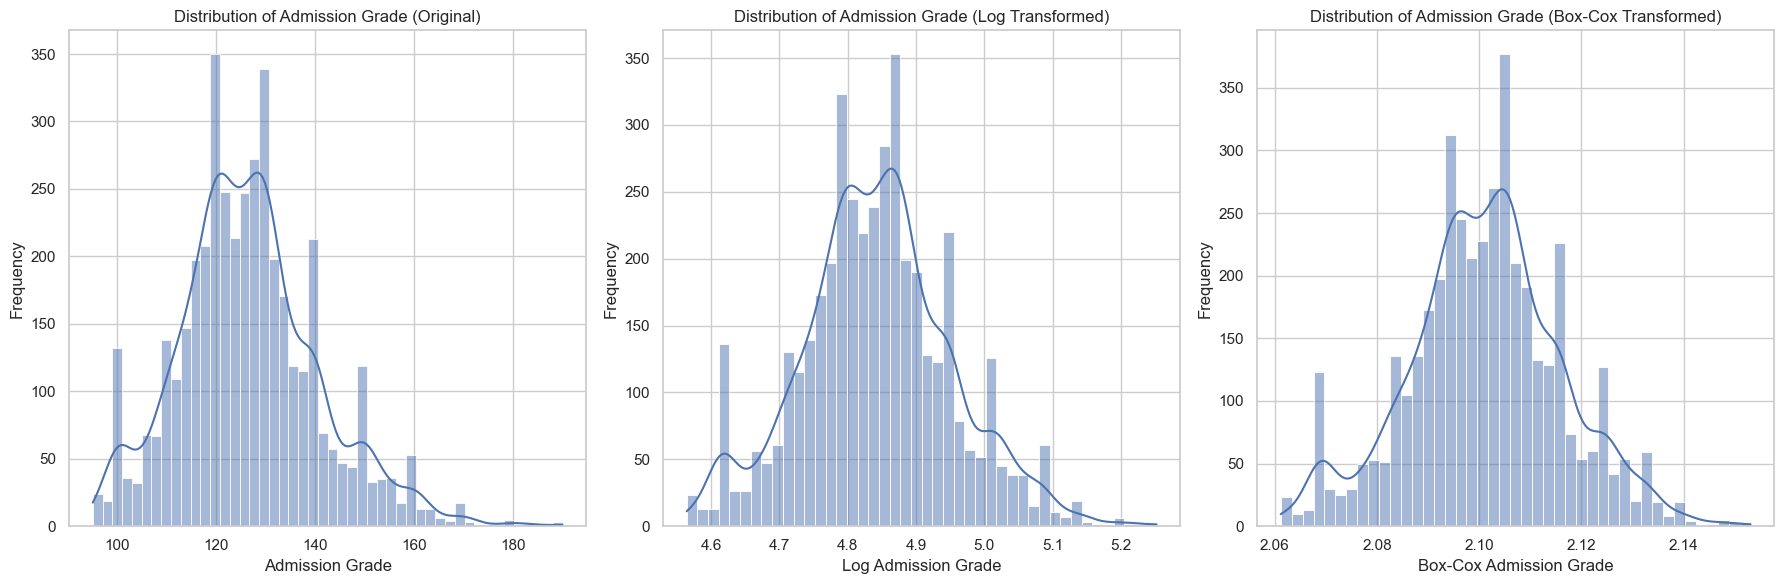

In [98]:
plt.figure(figsize=(18, 6))

# Plot the distribution of ADMISSION_GRADE (original)
plt.subplot(1, 3, 1)
sns.histplot(data['ADMISSION_GRADE'], kde=True)
plt.title('Distribution of Admission Grade (Original)')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')

# Plot the distribution of LOG_ADMISSION_GRADE (log-transformed)
plt.subplot(1, 3, 2)
sns.histplot(data['LOG_ADMISSION_GRADE'], kde=True)
plt.title('Distribution of Admission Grade (Log Transformed)')
plt.xlabel('Log Admission Grade')
plt.ylabel('Frequency')

# Plot the distribution of BOXCOX_ADMISSION_GRADE (Box-Cox transformed)
plt.subplot(1, 3, 3)
sns.histplot(data['BOXCOX_ADMISSION_GRADE'], kde=True)
plt.title('Distribution of Admission Grade (Box-Cox Transformed)')
plt.xlabel('Box-Cox Admission Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

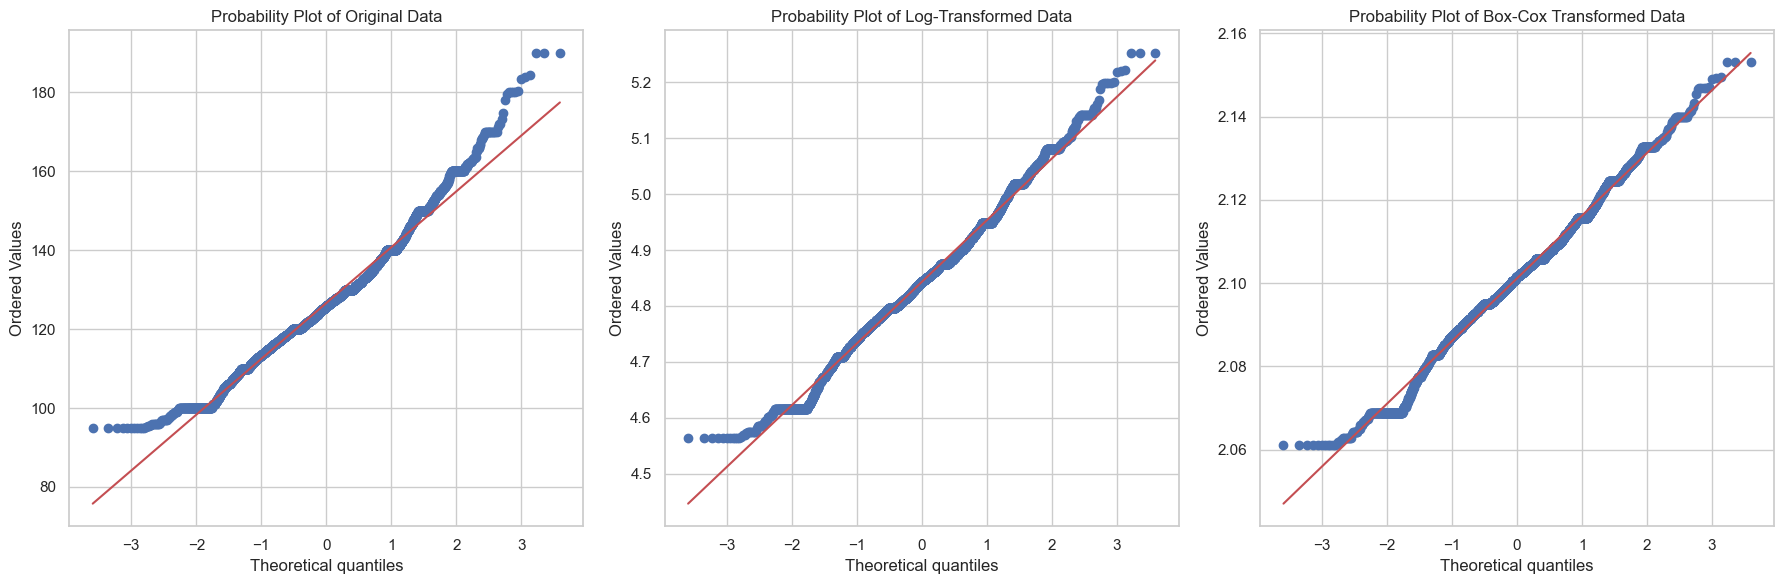

In [99]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Probability plot for the original data
plt.subplot(1, 3, 1)
stats.probplot(data['ADMISSION_GRADE'], dist="norm", plot=plt)
plt.title('Probability Plot of Original Data')

# Probability plot for the log-transformed data
plt.subplot(1, 3, 2)
stats.probplot(data['LOG_ADMISSION_GRADE'], dist="norm", plot=plt)
plt.title('Probability Plot of Log-Transformed Data')

# Probability plot for the Box-Cox transformed data
plt.subplot(1, 3, 3)
stats.probplot(data['BOXCOX_ADMISSION_GRADE'], dist="norm", plot=plt)
plt.title('Probability Plot of Box-Cox Transformed Data')

# Show the plots
plt.tight_layout()
plt.show()

#### Feature Scaling / Normalisation

##### Min-Max Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the ADMISSION_GRADE column
data['MINMAX_ADMISSION_GRADE'] = scaler.fit_transform(data[['ADMISSION_GRADE']])

# Display the first few rows to verify the transformation
print(data[['ADMISSION_GRADE', 'MINMAX_ADMISSION_GRADE']].head())

   ADMISSION_GRADE  MINMAX_ADMISSION_GRADE
1            142.5                0.500000
2            124.8                0.313684
3            119.6                0.258947
4            141.5                0.489474
5            114.8                0.208421


##### Standardisation (variance scaling)

In [101]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the ADMISSION_GRADE column
data['STANDARDIZED_ADMISSION_GRADE'] = scaler.fit_transform(data[['ADMISSION_GRADE']])

# Display the first few rows to verify the transformation
print(data[['ADMISSION_GRADE', 'STANDARDIZED_ADMISSION_GRADE']].head())

   ADMISSION_GRADE  STANDARDIZED_ADMISSION_GRADE
1            142.5                      1.112932
2            124.8                     -0.126551
3            119.6                     -0.490692
4            141.5                      1.042904
5            114.8                     -0.826823


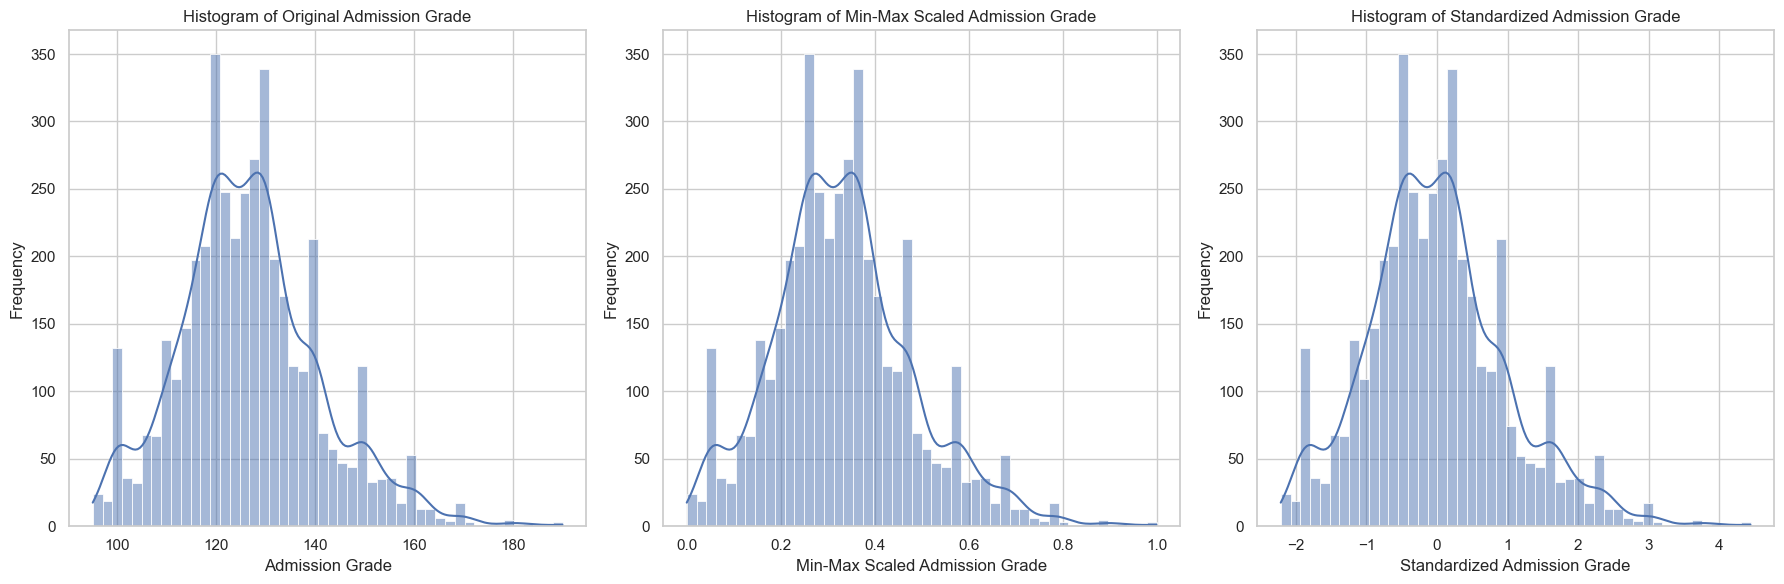

In [102]:
# Plot the histograms of original and scaled data
plt.figure(figsize=(18, 6))

# Plot the histogram of the original data
plt.subplot(1, 3, 1)
sns.histplot(data['ADMISSION_GRADE'], kde=True)
plt.title('Histogram of Original Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Frequency')

# Plot the histogram of the Min-Max scaled data
plt.subplot(1, 3, 2)
sns.histplot(data['MINMAX_ADMISSION_GRADE'], kde=True)
plt.title('Histogram of Min-Max Scaled Admission Grade')
plt.xlabel('Min-Max Scaled Admission Grade')
plt.ylabel('Frequency')

# Plot the histogram of the standardized data
plt.subplot(1, 3, 3)
sns.histplot(data['STANDARDIZED_ADMISSION_GRADE'], kde=True)
plt.title('Histogram of Standardized Admission Grade')
plt.xlabel('Standardized Admission Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [103]:
# standardisation (Z-score scaling)

### FE for categorical data

#### One-hot encoding

In [104]:
# Create a new dataframe with one categorical column and another column
new_df = data[['TARGET', 'ADMISSION_GRADE']]

# Display the first few rows of the new dataframe
print(new_df.head())

     TARGET  ADMISSION_GRADE
1  Graduate            142.5
2   Dropout            124.8
3  Graduate            119.6
4  Graduate            141.5
5  Graduate            114.8


In [105]:
# Convert the categorical variables in the DataFrame to one-hot encoding
one_hot_encoded_df = pd.get_dummies(new_df, columns=['TARGET'])

# Display the first few rows of the one-hot encoded DataFrame
print(one_hot_encoded_df.head())



   ADMISSION_GRADE  TARGET_Dropout  TARGET_Enrolled  TARGET_Graduate
1            142.5           False            False             True
2            124.8            True            False            False
3            119.6           False            False             True
4            141.5           False            False             True
5            114.8           False            False             True


In [106]:
# Perform one-hot encoding on the 'TUITION_FEES_UP_TO_DATE' index
tuition_grouped_encoded = pd.get_dummies(tuition_grouped, prefix='', prefix_sep='')

# Display the one-hot encoded DataFrame
print(tuition_grouped_encoded)

TARGET                   Dropout  Enrolled  Graduate
TUITION_FEES_UP_TO_DATE                             
no                           436        41        26
yes                          908       725      2108


In [107]:
# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(one_hot_encoded_df[['ADMISSION_GRADE']], one_hot_encoded_df[['TARGET_Dropout', 'TARGET_Enrolled', 'TARGET_Graduate']])
print(f'The slope coefficients of the linear regression model: {lin_reg.coef_}')
print(f'The intercept of the linear regression model: {lin_reg.intercept_}')

The slope coefficients of the linear regression model: [[-0.0031235 ]
 [-0.00123102]
 [ 0.00435452]]
The intercept of the linear regression model: [ 0.7121396   0.33634639 -0.04848599]


In [108]:
# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(tuition_grouped_encoded[['Dropout', 'Enrolled', 'Graduate']], tuition_grouped_encoded.index.map({'no': 0, 'yes': 1}))
print(f'The slope coefficients of the linear regression model: {lin_reg.coef_}')
print(f'The intercept of the linear regression model: {lin_reg.intercept_}')

The slope coefficients of the linear regression model: [9.39235446e-05 1.36109544e-04 4.14298347e-04]
The intercept of the linear regression model: -0.057302913778982


In [109]:
# The intercept represents the mean value of the dependent variable

intercept = lin_reg.intercept_
print(f"Intercept: {intercept}")

Intercept: -0.057302913778982


#### Dummy Coding

In [110]:
# Reset the index to make 'TUITION_FEES_UP_TO_DATE' a column
tuition_grouped_reset = tuition_grouped.reset_index()

# Perform dummy coding on the 'TUITION_FEES_UP_TO_DATE' column
tuition_grouped_dummy = pd.get_dummies(tuition_grouped_reset, columns=['TUITION_FEES_UP_TO_DATE'], drop_first=True)

# Display the first few rows of the dummy coded DataFrame
print(tuition_grouped_dummy)

   Dropout  Enrolled  Graduate  TUITION_FEES_UP_TO_DATE_yes
0      436        41        26                        False
1      908       725      2108                         True


### Fitting model on imbalanced datasets and how to fight bias

In [111]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the dummy classifier with the strategy 'most_frequent'
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the dummy classifier to the training data
dummy_clf.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate the accuracy
accuracy_dummy = accuracy_score(y_test_encoded, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {accuracy_dummy}")

# Generate the classification report
class_report_dummy = classification_report(y_test_encoded, y_pred_dummy, target_names=label_encoder.classes_)
print("Classification Report for Dummy Classifier:")
print(class_report_dummy)

Dummy Classifier Accuracy: 0.5017667844522968
Classification Report for Dummy Classifier:
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       277
    Enrolled       0.00      0.00      0.00       146
    Graduate       0.50      1.00      0.67       426

    accuracy                           0.50       849
   macro avg       0.17      0.33      0.22       849
weighted avg       0.25      0.50      0.34       849



c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [112]:
from sklearn.metrics import balanced_accuracy_score

# Calculate the dummy classifier accuracy
accuracy_dummy = accuracy_score(y_test_encoded, y_pred_dummy)

# Calculate the balanced accuracy
balanced_accuracy_dummy = balanced_accuracy_score(y_test_encoded, y_pred_dummy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy'],
    'Dummy Classifier': [accuracy_dummy, balanced_accuracy_dummy]
})

# Display the results
print(results_df)

              Metric  Dummy Classifier
0           Accuracy          0.501767
1  Balanced Accuracy          0.333333


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the logistic regression model
baseline_logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
baseline_logistic_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_baseline_logistic = baseline_logistic_model.predict(X_test)

# Calculate the accuracy
baseline_accuracy = accuracy_score(y_test_encoded, y_pred_baseline_logistic)
print(f"Baseline Logistic Regression Accuracy: {baseline_accuracy}")

# Generate the classification report
baseline_class_report = classification_report(y_test_encoded, y_pred_baseline_logistic, target_names=label_encoder.classes_)
print("Baseline Classification Report:")
print(baseline_class_report)

# Generate the confusion matrix
baseline_conf_matrix = confusion_matrix(y_test_encoded, y_pred_baseline_logistic)
print("Baseline Confusion Matrix:")
print(baseline_conf_matrix)

Baseline Logistic Regression Accuracy: 0.5147232037691402
Baseline Classification Report:
              precision    recall  f1-score   support

     Dropout       0.58      0.06      0.12       277
    Enrolled       0.00      0.00      0.00       146
    Graduate       0.51      0.98      0.67       426

    accuracy                           0.51       849
   macro avg       0.36      0.35      0.26       849
weighted avg       0.45      0.51      0.38       849

Baseline Confusion Matrix:
[[ 18   0 259]
 [  6   0 140]
 [  7   0 419]]


c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aidan_1k98io6\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Calculate the accuracy and balanced accuracy for the dummy classifier
accuracy_dummy = accuracy_score(y_test_encoded, y_pred_dummy)
balanced_accuracy_dummy = balanced_accuracy_score(y_test_encoded, y_pred_dummy)

# Calculate the accuracy and balanced accuracy for the logistic regression model
accuracy_logistic = accuracy_score(y_test_encoded, y_pred_logistic)
balanced_accuracy_logistic = balanced_accuracy_score(y_test_encoded, y_pred_logistic)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy'],
    'Dummy Classifier': [accuracy_dummy, balanced_accuracy_dummy],
    'Logistic Regression': [accuracy_logistic, balanced_accuracy_logistic]
})

# Display the results
print(results_df)

              Metric  Dummy Classifier  Logistic Regression
0           Accuracy          0.501767             0.548881
1  Balanced Accuracy          0.333333             0.396620


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate the classification report
class_report_rf = classification_report(y_test_encoded, y_pred_rf, target_names=label_encoder.classes_)
print("Classification Report for Random Forest:")
print(class_report_rf)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.4876325088339223
Classification Report for Random Forest:
              precision    recall  f1-score   support

     Dropout       0.41      0.42      0.42       277
    Enrolled       0.22      0.08      0.12       146
    Graduate       0.56      0.67      0.61       426

    accuracy                           0.49       849
   macro avg       0.40      0.39      0.38       849
weighted avg       0.45      0.49      0.46       849

Confusion Matrix for Random Forest:
[[117  15 145]
 [ 56  12  78]
 [113  28 285]]


In [116]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Calculate the accuracy and balanced accuracy for the dummy classifier
accuracy_dummy = accuracy_score(y_test_encoded, y_pred_dummy)
balanced_accuracy_dummy = balanced_accuracy_score(y_test_encoded, y_pred_dummy)

# Calculate the accuracy and balanced accuracy for the logistic regression model
accuracy_logistic = accuracy_score(y_test_encoded, y_pred_logistic)
balanced_accuracy_logistic = balanced_accuracy_score(y_test_encoded, y_pred_logistic)

# Calculate the accuracy and balanced accuracy for the random forest model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test_encoded, y_pred_rf)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy'],
    'Dummy Classifier': [accuracy_dummy, balanced_accuracy_dummy],
    'Logistic Regression': [accuracy_logistic, balanced_accuracy_logistic],
    'Random Forest': [accuracy_rf, balanced_accuracy_rf]
})

# Display the results
print(results_df)

              Metric  Dummy Classifier  Logistic Regression  Random Forest
0           Accuracy          0.501767             0.548881       0.487633
1  Balanced Accuracy          0.333333             0.396620       0.391196


In [117]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply under-sampling to the training data
X_train_under, y_train_under = rus.fit_resample(X_train, y_train_encoded)

# Initialize the logistic regression model
logistic_model_under = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the under-sampled training data
logistic_model_under.fit(X_train_under, y_train_under)

# Make predictions on the test data
y_pred_under = logistic_model_under.predict(X_test)

# Calculate the accuracy
accuracy_under = accuracy_score(y_test_encoded, y_pred_under)
print(f"Under-sampled Logistic Regression Accuracy: {accuracy_under}")

# Generate the classification report
class_report_under = classification_report(y_test_encoded, y_pred_under, target_names=label_encoder.classes_)
print("Classification Report for Under-sampled Logistic Regression:")
print(class_report_under)

# Generate the confusion matrix
conf_matrix_under = confusion_matrix(y_test_encoded, y_pred_under)
print("Confusion Matrix for Under-sampled Logistic Regression:")
print(conf_matrix_under)

Under-sampled Logistic Regression Accuracy: 0.43462897526501765
Classification Report for Under-sampled Logistic Regression:
              precision    recall  f1-score   support

     Dropout       0.35      0.51      0.42       277
    Enrolled       0.16      0.05      0.08       146
    Graduate       0.55      0.51      0.53       426

    accuracy                           0.43       849
   macro avg       0.35      0.36      0.34       849
weighted avg       0.42      0.43      0.42       849

Confusion Matrix for Under-sampled Logistic Regression:
[[142  12 123]
 [ 84   8  54]
 [176  31 219]]


In [118]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Display the class distribution before balancing
print("Class distribution before balancing:", Counter(y_train_encoded))

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Display the class distribution after balancing
print("Class distribution after balancing:", Counter(y_train_smote))

# Initialize the Random Forest classifier
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the SMOTE balanced training data
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote_rf = rf_model_smote.predict(X_test)

# Calculate the accuracy
accuracy_smote_rf = accuracy_score(y_test_encoded, y_pred_smote_rf)
print(f"SMOTE Random Forest Accuracy: {accuracy_smote_rf}")

# Generate the classification report
class_report_smote_rf = classification_report(y_test_encoded, y_pred_smote_rf, target_names=label_encoder.classes_)
print("Classification Report for SMOTE Random Forest:")
print(class_report_smote_rf)

# Generate the confusion matrix
conf_matrix_smote_rf = confusion_matrix(y_test_encoded, y_pred_smote_rf)
print("Confusion Matrix for SMOTE Random Forest:")
print(conf_matrix_smote_rf)

Class distribution before balancing: Counter({2: 1708, 0: 1067, 1: 620})
Class distribution after balancing: Counter({0: 1708, 2: 1708, 1: 1708})
SMOTE Random Forest Accuracy: 0.425206124852768
Classification Report for SMOTE Random Forest:
              precision    recall  f1-score   support

     Dropout       0.35      0.31      0.33       277
    Enrolled       0.21      0.28      0.24       146
    Graduate       0.58      0.55      0.56       426

    accuracy                           0.43       849
   macro avg       0.38      0.38      0.38       849
weighted avg       0.44      0.43      0.43       849

Confusion Matrix for SMOTE Random Forest:
[[ 87  78 112]
 [ 46  41  59]
 [113  80 233]]


In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X_train_smote, y_train_smote, cv=skf, scoring='accuracy')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.36097561 0.38926829 0.38536585 0.3795122  0.37011719]
Mean cross-validation score: 0.37704782774390244


In [120]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Calculate the accuracy and balanced accuracy for the Random Forest model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test_encoded, y_pred_rf)

# Calculate the accuracy and balanced accuracy for the SMOTE Random Forest model
accuracy_smote_rf = accuracy_score(y_test_encoded, y_pred_smote_rf)
balanced_accuracy_smote_rf = balanced_accuracy_score(y_test_encoded, y_pred_smote_rf)

# Calculate the accuracy and balanced accuracy for the under-sampled Logistic Regression model
accuracy_under = accuracy_score(y_test_encoded, y_pred_under)
balanced_accuracy_under = balanced_accuracy_score(y_test_encoded, y_pred_under)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy'],
    'Random Forest': [accuracy_rf, balanced_accuracy_rf],
    'SMOTE Random Forest': [accuracy_smote_rf, balanced_accuracy_smote_rf],
    'Under-sampled Logistic Regression': [accuracy_under, balanced_accuracy_under]
})

# Display the results
print(results_df)

              Metric  Random Forest  SMOTE Random Forest  \
0           Accuracy       0.487633             0.425206   
1  Balanced Accuracy       0.391196             0.380617   

   Under-sampled Logistic Regression  
0                           0.434629  
1                           0.360505  


## Tree-based methods

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Generate the classification report
class_report_dt = classification_report(y_test_encoded, y_pred_dt, target_names=label_encoder.classes_)
print("Classification Report for Decision Tree:")
print(class_report_dt)

# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test_encoded, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate the classification report
class_report_rf = classification_report(y_test_encoded, y_pred_rf, target_names=label_encoder.classes_)
print("Classification Report for Random Forest:")
print(class_report_rf)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Decision Tree Accuracy: 0.46996466431095407
Classification Report for Decision Tree:
              precision    recall  f1-score   support

     Dropout       0.39      0.48      0.43       277
    Enrolled       0.21      0.08      0.11       146
    Graduate       0.56      0.60      0.58       426

    accuracy                           0.47       849
   macro avg       0.39      0.38      0.37       849
weighted avg       0.44      0.47      0.45       849

Confusion Matrix for Decision Tree:
[[132  13 132]
 [ 64  11  71]
 [142  28 256]]
Random Forest Accuracy: 0.4876325088339223
Classification Report for Random Forest:
              precision    recall  f1-score   support

     Dropout       0.41      0.42      0.42       277
    Enrolled       0.22      0.08      0.12       146
    Graduate       0.56      0.67      0.61       426

    accuracy                           0.49       849
   macro avg       0.40      0.39      0.38       849
weighted avg       0.45      0.49      0.4

## 5) Experiments

In [122]:
# currently on lecture 8 : Tree-based methods (to continue)

# rename file to something like: code_based_on_lectures


In [123]:
# chat: https://claude.ai/chat/014c4dc6-3311-4ac9-a71d-ec5769d968fb
# to do:

# binary code marital status (single / non-single)



In [124]:
# to prompt:

# [upload notebook] - how can this be improved, that adheres to the assessment criteria, that must run in correct order from start to finish

# copilot: go through notebook and brief step by step and address all points

In [125]:
# don't just bung in random shit, pick out what techniques are useful from the lectures (not all of them)
# don't test code in same dataframe as main code, in case it interferes with earlier code (when rerun it)
# run main notebook side by side with an experimental notebook (test out techniques, extract what works)

In [126]:
# Research Questions:

# What factors significantly influence student dropout probability?
# Can we develop a reliable early warning system for student dropout risk?
# How do academic performance metrics in the first year relate to graduation outcomes?


# What are the key predictors of student dropout?
# How effective are various machine learning models in predicting dropout?
# How early can dropout risk be reliably identified?
# What is the impact of preprocessing and feature engineering on model performance?
# How can explainable AI techniques be integrated for actionable insights?


In [127]:
# # How do academic performance metrics in the first year relate to graduation outcomes?

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Define the feature columns (first-year academic performance metrics) and the target variable
# feature_columns = [
#     'CURRICULAR_UNITS_1ST_SEM_CREDITED', 'CURRICULAR_UNITS_1ST_SEM_ENROLLED',
#     'CURRICULAR_UNITS_1ST_SEM_EVALUATIONS', 'CURRICULAR_UNITS_1ST_SEM_APPROVED',
#     'CURRICULAR_UNITS_1ST_SEM_GRADE', 'CURRICULAR_UNITS_1ST_SEM_WITHOUT_EVALUATIONS',
#     'CURRICULAR_UNITS_2ND_SEM_CREDITED', 'CURRICULAR_UNITS_2ND_SEM_ENROLLED',
#     'CURRICULAR_UNITS_2ND_SEM_EVALUATIONS', 'CURRICULAR_UNITS_2ND_SEM_APPROVED',
#     'CURRICULAR_UNITS_2ND_SEM_GRADE', 'CURRICULAR_UNITS_2ND_SEM_WITHOUT_EVALUATIONS'
# ]
# target_column = 'TARGET'

# # Split the data into training and test sets
# X = data[feature_columns]
# y = data[target_column]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Encode the target variable
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Initialize the logistic regression model
# logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# # Fit the model to the training data
# logistic_model.fit(X_train, y_train_encoded)

# # Make predictions on the test data
# y_pred_logistic = logistic_model.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test_encoded, y_pred_logistic)
# print(f"Accuracy: {accuracy}")

# # Generate the classification report
# class_report = classification_report(y_test_encoded, y_pred_logistic, target_names=label_encoder.classes_)
# print("Classification Report:")
# print(class_report)

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_test_encoded, y_pred_logistic)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.title("Confusion Matrix Heatmap")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [128]:
# Null and Alternative Hypotheses:
# A. Academic Performance Impact

# H0: There is no significant difference in first-semester grades between dropout and non-dropout students
# H1: Students who drop out have significantly different first-semester grades
# Test: Independent t-test
# Significance level: α = 0.05

# B. Socioeconomic Factors

# H0: Scholarship status is independent of dropout probability
# H1: There is an association between scholarship status and dropout probability
# Test: Chi-square test of independence
# Significance level: α = 0.05

In [129]:
# # Linear Regression Accuracy

# from sklearn.metrics import accuracy_score

# # Calculate the accuracy
# accuracy = accuracy_score(y_test_encoded, y_pred.round())

# # Print the accuracy
# print(f"Accuracy: {accuracy}")

# ## Accuracy: 0.20023557126030625

In [130]:
# Area Under the Precision-Recall Curve (AUC-PR)

In [131]:
# # feature engineering

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import pandas as pd

# # Define the feature columns and the target variable
# feature_columns = ['ADMISSION_GRADE', 'AGE_AT_ENROLLMENT', 'PREVIOUS_QUALIFICATION_GRADE']  # Example feature columns
# target_column = 'TARGET'

# # Create a DataFrame with the feature columns
# X = data[feature_columns]

# # Create interaction and polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Convert the polynomial features to a DataFrame
# poly_feature_names = poly.get_feature_names_out(feature_columns)
# X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# # One-hot encode categorical variables (if any)
# # Assuming 'COURSE' is a categorical variable
# categorical_features = ['COURSE']
# one_hot_encoder = OneHotEncoder(sparse=False)
# X_categorical = one_hot_encoder.fit_transform(data[categorical_features])

# # Convert the one-hot encoded features to a DataFrame
# categorical_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)
# X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_feature_names)

# # Combine the original, polynomial, and one-hot encoded features
# X_combined = pd.concat([X, X_poly_df, X_categorical_df], axis=1)

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_combined)

# # Convert the scaled features to a DataFrame
# X_scaled_df = pd.DataFrame(X_scaled, columns=X_combined.columns)

# # Display the first few rows of the engineered features
# print(X_scaled_df.head())

In [132]:
# normality tests 

In [ ]:
# finding patterns in data:

# k-means clustering 

# principal component analysis

# association rule mining 

In [134]:
# feature importance: SHAP

In [135]:
# cross-validation

# hyperparameter tuning

In [136]:

# ########### Do the same for other models ############
# ########### Run Logistic regression ############

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from scipy import sparse


# # Identifying continuous and categorical columns
# continuous_columns = X_train.select_dtypes(include="number").columns
# categorical_columns = X_train.select_dtypes(exclude="number").columns

# ### Preprocessing continuous columns for this fold
# # Step 1: Impute missing values for continuous columns with their mean
# imputer_cont = SimpleImputer(strategy='mean')
# X_train_cont_imputed = imputer_cont.fit_transform(X_train[continuous_columns])
# # Step 2: Scale the continuous columns
# scaler = StandardScaler()
# X_train_cont_scaled = scaler.fit_transform(X_train_cont_imputed)
# # Step 3: Apply the same transformation to test data
# X_test_cont_imputed = imputer_cont.transform(X_test[continuous_columns])
# X_test_cont_scaled = scaler.transform(X_test_cont_imputed)

# ### Preprocessing categorical columns for this fold
# # Step 1: Impute missing values for categorical columns with the value 'missing'
# imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
# X_train_cat_imputed = imputer_cat.fit_transform(X_train[categorical_columns])
# # Step 2: Transform categorical columns using OneHotEncoder
# encoder_cat = OneHotEncoder(handle_unknown='ignore')
# X_train_cat_encoded = encoder_cat.fit_transform(X_train_cat_imputed)
# # Step 3: Apply the same transformation to test data
# X_test_cat_imputed = imputer_cat.transform(X_test[categorical_columns])
# X_test_cat_encoded = encoder_cat.transform(X_test_cat_imputed)

# ### Combine continuous and categorical preprocessed columns
# X_train_preprocessed = sparse.hstack((X_train_cont_scaled, X_train_cat_encoded))
# X_test_preprocessed = sparse.hstack((X_test_cont_scaled, X_test_cat_encoded))

# ### Fit Logistic Regression model
# lr_clf = LogisticRegression(max_iter=500)
# lr_clf.fit(X_train_preprocessed, y_train_encoded)

# ### Predict and evaluate on the test set
# y_pred = lr_clf.predict(X_test_preprocessed)
# test_acc = accuracy_score(y_test_encoded, y_pred)
# test_balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)

# # Append the results to scores and df_scores
# index += ["Logistic regression"]
# scores["Accuracy"].append(test_acc)
# scores["Balanced accuracy"].append(test_balanced_acc)
# df_scores = pd.DataFrame(scores, index=index)
# df_scores